In [1]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.2
numpy: 1.18.5
matplotlib: 3.3.1
pandas: 1.1.1
sklearn: 0.23.2


In [2]:
# Load libraries
from numpy import log
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load dataset
url = "f-air-quality-data.csv"
names = ['Temperature (°C)', 'Humidity (%RH)', 'PM25 (ug/m3)', 'CO (PPM)', 'NO2 (PPM)', 'O3 (PPB)', 'Wind Speed (m/s)', 'Wind Direction', 'api_weather', 'date'
]
dataset = read_csv(url, names=names, header=0)

In [4]:
dataset.head()

Temperature (°C)  Humidity (%RH)  PM25 (ug/m3)  CO (PPM)  NO2 (PPM)  \
0              36.1            58.7           0.0     2.913      0.292   
1              35.8            58.7           0.0     2.733      0.280   
2              36.1            58.3           0.0     2.864      0.283   
3              35.7            59.3          17.0     2.877      0.267   
4              35.3            59.8           3.0     2.652      0.265   

   O3 (PPB)  Wind Speed (m/s) Wind Direction api_weather  \
0    10.000               4.1              W      Clouds   
1    10.000               4.1              W      Clouds   
2    10.000               4.1              W      Clouds   
3    10.000               3.6              W      Clouds   
4    10.559               3.6              W      Clouds   

                         date  
0  2020-09-02 19:29:23.949000  
1  2020-09-02 19:49:24.133000  
2  2020-09-02 20:09:24.170000  
3  2020-09-02 20:29:24.207000  
4  2020-09-02 20:49:24.012000

In [5]:
dataset.dtypes

Temperature (°C)    float64
Humidity (%RH)      float64
PM25 (ug/m3)        float64
CO (PPM)            float64
NO2 (PPM)           float64
O3 (PPB)            float64
Wind Speed (m/s)    float64
Wind Direction       object
api_weather          object
date                 object
dtype: object

In [6]:
# see how well the data correlate against one another (particularly the APCs vs MFs)
dataset.corr()

Temperature (°C)  Humidity (%RH)  PM25 (ug/m3)  CO (PPM)  \
Temperature (°C)          1.000000       -0.955189      0.029951 -0.140477   
Humidity (%RH)           -0.955189        1.000000     -0.028794  0.150399   
PM25 (ug/m3)              0.029951       -0.028794      1.000000 -0.016354   
CO (PPM)                 -0.140477        0.150399     -0.016354  1.000000   
NO2 (PPM)                -0.247009        0.253681     -0.006997 -0.074008   
O3 (PPB)                 -0.029795       -0.052110     -0.003425 -0.224173   
Wind Speed (m/s)          0.428161       -0.417319      0.018089 -0.156067   

                  NO2 (PPM)  O3 (PPB)  Wind Speed (m/s)  
Temperature (°C)  -0.247009 -0.029795          0.428161  
Humidity (%RH)     0.253681 -0.052110         -0.417319  
PM25 (ug/m3)      -0.006997 -0.003425          0.018089  
CO (PPM)          -0.074008 -0.224173         -0.156067  
NO2 (PPM)          1.000000 -0.396870         -0.306331  
O3 (PPB)          -0.396870  1.000000          0.253206  
Wind Speed (m/s)  -0.306331  0.253206          1.000000

## We take only the hourly measurements

In [7]:
dataset = dataset[::3]

In [8]:
dataset.head()

Temperature (°C)  Humidity (%RH)  PM25 (ug/m3)  CO (PPM)  NO2 (PPM)  \
0               36.1            58.7           0.0     2.913      0.292   
3               35.7            59.3          17.0     2.877      0.267   
6               35.0            59.4           0.0     2.486      0.253   
9               35.1            59.1           7.0     3.041      0.270   
12              34.7            60.0           0.0     2.833      0.262   

    O3 (PPB)  Wind Speed (m/s) Wind Direction api_weather  \
0     10.000               4.1              W      Clouds   
3     10.000               3.6              W      Clouds   
6     16.663               2.6              W      Clouds   
9     12.623               2.6             SW      Clouds   
12    12.020               1.5              W      Clouds   

                          date  
0   2020-09-02 19:29:23.949000  
3   2020-09-02 20:29:24.207000  
6   2020-09-02 21:29:26.061000  
9   2020-09-02 22:29:23.989000  
12  2020-09-02 23:29:29.660000

## Scale the NO2 PPM to PPB

In [9]:
dataset['NO2 (PPM)'].head()

0     0.292
3     0.267
6     0.253
9     0.270
12    0.262
Name: NO2 (PPM), dtype: float64

In [10]:
dataset['NO2 (PPM)'] *= 1000

In [11]:
dataset['NO2 (PPM)'].head()

0     292.0
3     267.0
6     253.0
9     270.0
12    262.0
Name: NO2 (PPM), dtype: float64

## Transform categorical columns to numerical values

In [12]:
# see categorical cell values
dataset['Wind Direction'].value_counts()

N     347
W     162
SE    151
E     140
SW     96
NW     89
NE     53
S      50
Name: Wind Direction, dtype: int64

In [13]:
dataset['api_weather'].value_counts()

Clouds               737
Rain                 317
Rain&Thunderstorm     13
Clear                 11
Thunderstorm           5
Thunderstorm&Rain      4
Rain&Mist              1
Name: api_weather, dtype: int64

In [14]:
# reformat api weather column to be consistent (make multi-valued item order not matter)
def reformat_weather(weather_string):
    weather_conditions = weather_string.split('&')
    if (len(weather_conditions) == 1):
        return weather_string
    else:
        idx = -1
        try:
            idx = weather_conditions.index('Rain')
        except ValueError:
            print('WARNING: multivalued item is not valid')
            return weather_string
        if (idx == 1):
            weather_conditions[0],weather_conditions[1] = weather_conditions[1],weather_conditions[0]
        return "&".join(weather_conditions)
    
    
dataset['api_weather'] = dataset['api_weather'].apply(reformat_weather)

In [15]:
dataset['api_weather'].value_counts()

Clouds               737
Rain                 317
Rain&Thunderstorm     17
Clear                 11
Thunderstorm           5
Rain&Mist              1
Name: api_weather, dtype: int64

In [16]:
# reformat categorical columns to numerical columns
lbl_encoder = LabelEncoder()
dataset['api_weather Code'] = lbl_encoder.fit_transform(dataset.api_weather)
dataset['Wind Direction Code'] = lbl_encoder.fit_transform(dataset['Wind Direction'])
dataset.drop(['Wind Direction', 'api_weather'], axis=1, inplace=True)

In [17]:
dataset['api_weather Code'].value_counts()

1    737
2    317
4     17
0     11
5      5
3      1
Name: api_weather Code, dtype: int64

In [18]:
dataset['Wind Direction Code'].value_counts()

1    347
7    162
5    151
0    140
6     96
3     89
2     53
4     50
Name: Wind Direction Code, dtype: int64

In [19]:
dataset.date = pd.to_datetime(dataset.date, format='%Y-%m-%d %H:%M:%S')
## reformat date to appropriate numerical value (hours)
# dataset['time'] = dataset.date.apply(lambda date: (date.hour * 3600) + (date.minute * 60) + date.second)

In [20]:
# shape
print(dataset.shape)

(1088, 10)


In [21]:
# head
dataset.head()

Temperature (°C)  Humidity (%RH)  PM25 (ug/m3)  CO (PPM)  NO2 (PPM)  \
0               36.1            58.7           0.0     2.913      292.0   
3               35.7            59.3          17.0     2.877      267.0   
6               35.0            59.4           0.0     2.486      253.0   
9               35.1            59.1           7.0     3.041      270.0   
12              34.7            60.0           0.0     2.833      262.0   

    O3 (PPB)  Wind Speed (m/s)                    date  api_weather Code  \
0     10.000               4.1 2020-09-02 19:29:23.949                 1   
3     10.000               3.6 2020-09-02 20:29:24.207                 1   
6     16.663               2.6 2020-09-02 21:29:26.061                 1   
9     12.623               2.6 2020-09-02 22:29:23.989                 1   
12    12.020               1.5 2020-09-02 23:29:29.660                 1   

    Wind Direction Code  
0                     7  
3                     7  
6                     7  
9                     6  
12                    7

In [22]:
# check for nulls
dataset.isnull().sum()

Temperature (°C)       0
Humidity (%RH)         0
PM25 (ug/m3)           0
CO (PPM)               0
NO2 (PPM)              0
O3 (PPB)               0
Wind Speed (m/s)       0
date                   0
api_weather Code       0
Wind Direction Code    0
dtype: int64

In [23]:
# descriptions
dataset['Temperature (°C)'] = dataset['Temperature (°C)'].astype(float)
print(dataset.describe(include = 'all', datetime_is_numeric=True))

       Temperature (°C)  Humidity (%RH)  PM25 (ug/m3)     CO (PPM)  \
count       1088.000000     1088.000000   1088.000000  1088.000000   
mean          35.228885       57.902436    166.877681     5.489839   
min           30.600000       39.650000      0.000000     1.926000   
25%           33.450000       53.737500      8.000000     4.535125   
50%           34.800000       59.100000     14.000000     5.262000   
75%           36.800000       62.800000     23.500000     6.134000   
max           42.050000       76.300000  36280.000000    68.387000   
std            2.300985        6.117448   2262.627337     2.922181   

         NO2 (PPM)     O3 (PPB)  Wind Speed (m/s)  \
count  1088.000000  1088.000000       1088.000000   
mean    100.908563    51.121215          2.312151   
min      10.000000    10.000000          0.350000   
25%      68.500000    27.938000          1.000000   
50%     102.000000    44.116000          2.100000   
75%     125.500000    67.793250          3.100000  

# Plot and check for outliers
Consider only the gases as they are susceptible to noise

array([<AxesSubplot:xlabel='date', ylabel='PM25 (ug/m3)'>], dtype=object)

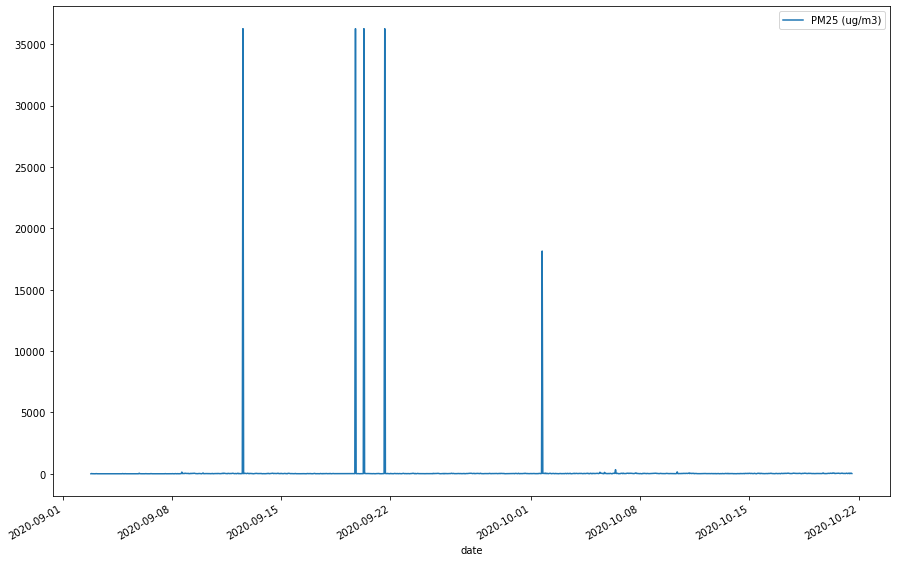

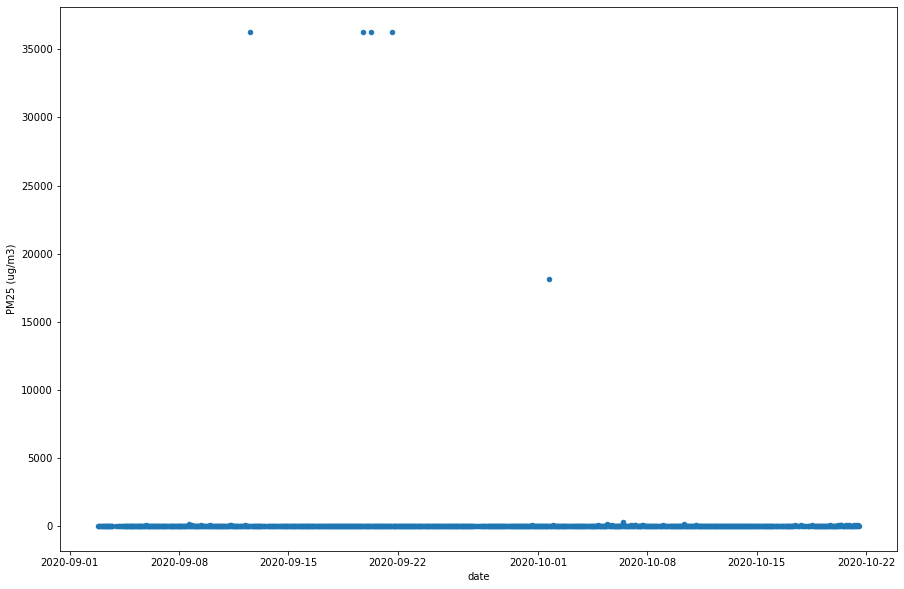

In [24]:
dataset.plot(kind = 'line', x='date', y='PM25 (ug/m3)', subplots=True, figsize=(15,10))
dataset.plot(kind = 'scatter', x='date', y='PM25 (ug/m3)', subplots=True, figsize=(15,10))

array([<AxesSubplot:xlabel='date', ylabel='CO (PPM)'>], dtype=object)

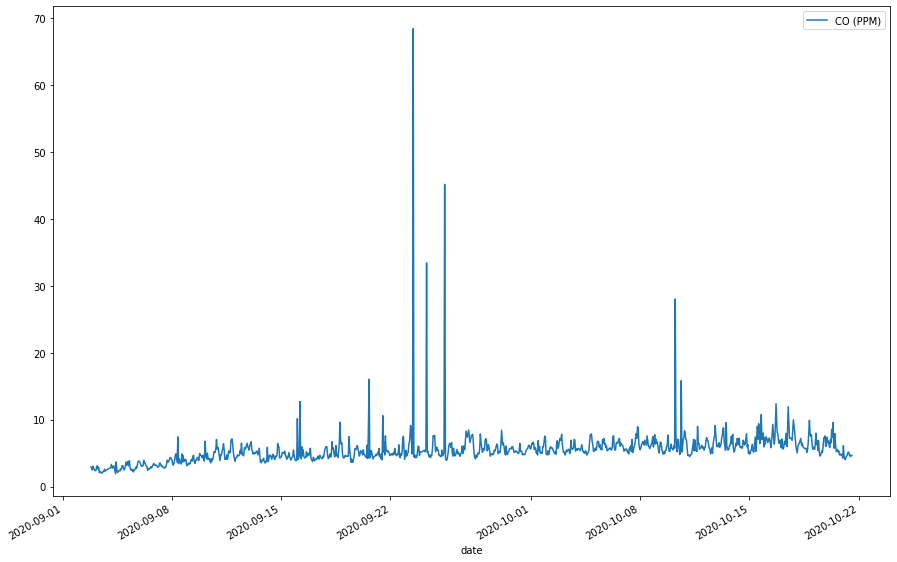

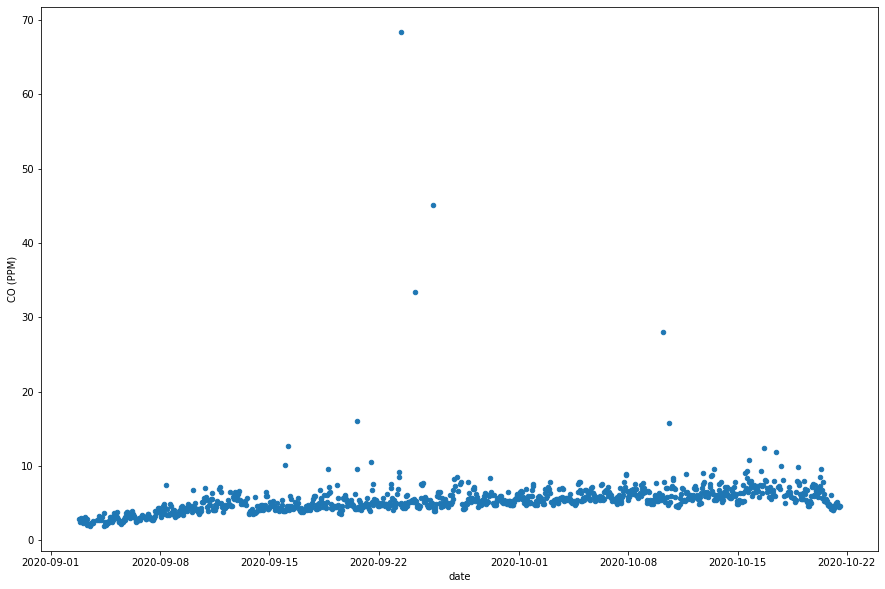

In [25]:
dataset.plot(kind = 'line', x='date', y='CO (PPM)', subplots=True, figsize=(15,10))
dataset.plot(kind = 'scatter', x='date', y='CO (PPM)', subplots=True, figsize=(15,10))

array([<AxesSubplot:xlabel='date', ylabel='NO2 (PPM)'>], dtype=object)

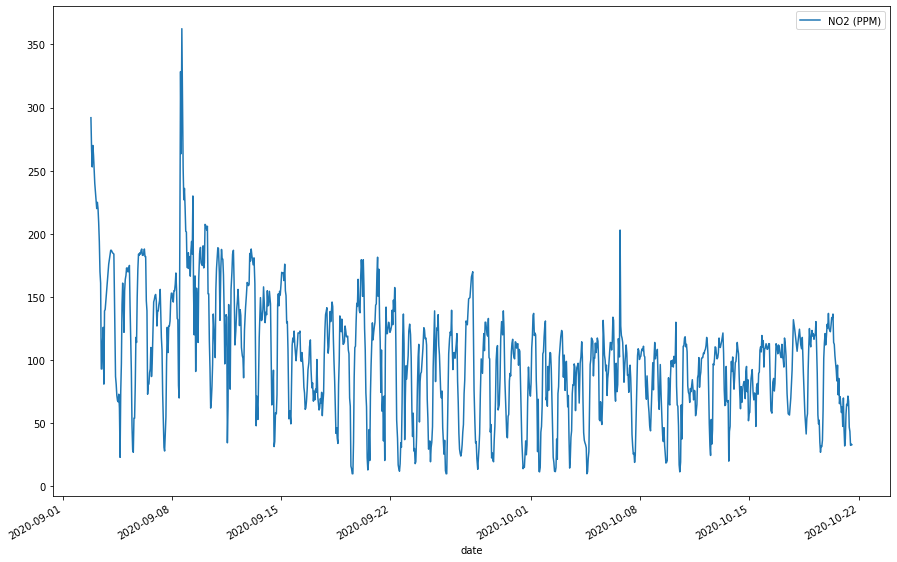

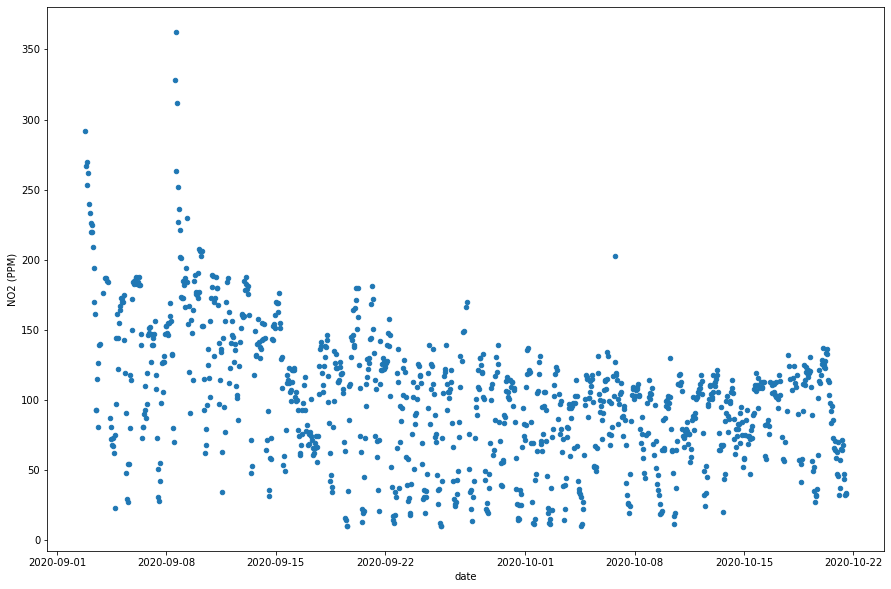

In [26]:
dataset.plot(kind = 'line', x='date', y='NO2 (PPM)', subplots=True, figsize=(15,10))
dataset.plot(kind = 'scatter', x='date', y='NO2 (PPM)', subplots=True, figsize=(15,10))

array([<AxesSubplot:xlabel='date', ylabel='O3 (PPB)'>], dtype=object)

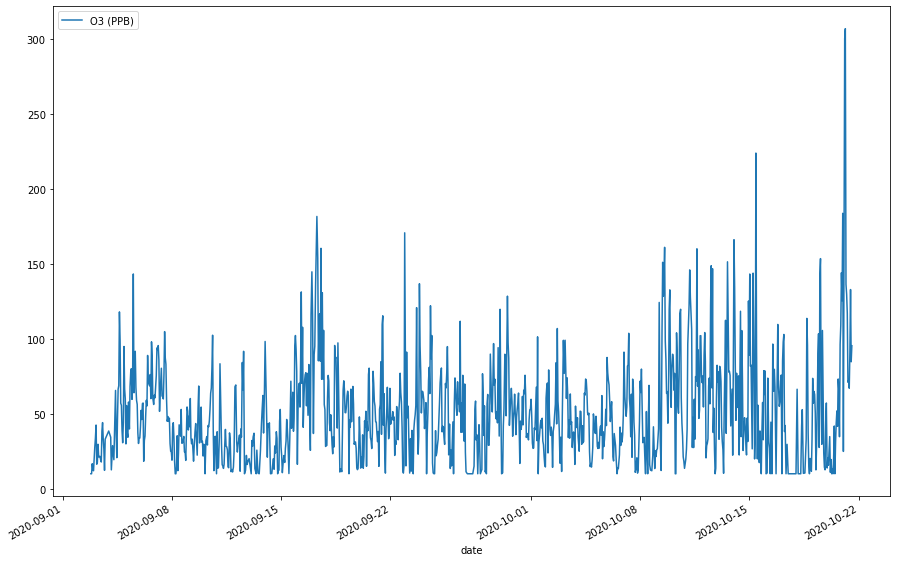

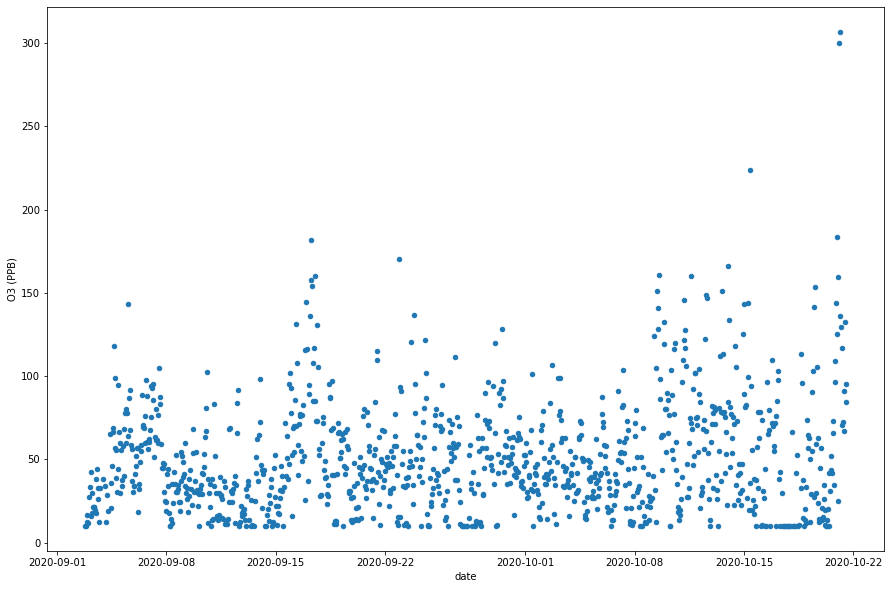

In [27]:
dataset.plot(kind = 'line', x='date', y='O3 (PPB)', subplots=True, figsize=(15,10))
dataset.plot(kind = 'scatter', x='date', y='O3 (PPB)', subplots=True, figsize=(15,10))

## Identifying Outliers with Skewness
[Reference](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers)

In [28]:
print(dataset['PM25 (ug/m3)'].skew())
dataset['PM25 (ug/m3)'].describe()

15.452260004927922


count     1088.000000
mean       166.877681
std       2262.627337
min          0.000000
25%          8.000000
50%         14.000000
75%         23.500000
max      36280.000000
Name: PM25 (ug/m3), dtype: float64

In [29]:
print(dataset['CO (PPM)'].skew())
dataset['CO (PPM)'].describe()

12.83057262445107


count    1088.000000
mean        5.489839
std         2.922181
min         1.926000
25%         4.535125
50%         5.262000
75%         6.134000
max        68.387000
Name: CO (PPM), dtype: float64

In [30]:
print(dataset['NO2 (PPM)'].skew())
dataset['NO2 (PPM)'].describe()

0.6711193418876237


count    1088.000000
mean      100.908563
std        48.206144
min        10.000000
25%        68.500000
50%       102.000000
75%       125.500000
max       362.500000
Name: NO2 (PPM), dtype: float64

In [31]:
print(dataset['O3 (PPB)'].skew())
dataset['O3 (PPB)'].describe()

1.736110342552237


count    1088.000000
mean       51.121215
std        34.016256
min        10.000000
25%        27.938000
50%        44.116000
75%        67.793250
max       306.724000
Name: O3 (PPB), dtype: float64

# We need to remove those outliers!
## Best way to do this is by interpolating the outlier data since dropping the entire row will affect the other features

We consider two ways to do this:
1. [Use the quantile values to remove the outliers and then interpolate](#quantile_interpolation)
2. [Use the z-score to determine values which need to be interpolated and then interpolate](#zscore_interpolation)

## Use the quantile values to remove the outliers and then interpolate <a id='quantile_interpolation'>[1]</a>
We use the median value to interpolate the outliers

In [24]:
pm25_max_threshold, pm25_min_threshold = dataset['PM25 (ug/m3)'].quantile([0.99, 0.01])
print('pm25 max threshold: ' + str(pm25_max_threshold))
print('pm25 min threshold: ' + str(pm25_min_threshold))

co_max_threshold, co_min_threshold = dataset['CO (PPM)'].quantile([0.99, 0.01])
print('co max threshold: ' + str(co_max_threshold))
print('co min threshold: ' + str(co_min_threshold))

no2_max_threshold, no2_min_threshold = dataset['NO2 (PPM)'].quantile([0.99, 0.01])
print('no2 max threshold: ' + str(no2_max_threshold))
print('no2 min threshold: ' + str(no2_min_threshold))

o3_max_threshold, o3_min_threshold = dataset['O3 (PPB)'].quantile([0.99, 0.01])
print('o3 max threshold: ' + str(o3_max_threshold))
print('o3 min threshold: ' + str(o3_min_threshold))

pm25 max threshold: 70.12999999999988
pm25 min threshold: 0.0
co max threshold: 10.223264999999948
co min threshold: 2.275
no2 max threshold: 236.51999999999956
no2 min threshold: 12.0
o3 max threshold: 157.96385999999978
o3 min threshold: 10.0


In [25]:
# identify how many we need to interpolate

ol_count = dataset[ (dataset['PM25 (ug/m3)'] < pm25_min_threshold) | (dataset['PM25 (ug/m3)'] > pm25_max_threshold) ].shape[0]
print('pm25 outliers: {}'.format(ol_count))
ol_count = dataset[ (dataset['CO (PPM)'] < co_min_threshold) | (dataset['CO (PPM)'] > co_max_threshold) ].shape[0]
print('co outliers: {}'.format(ol_count))
ol_count = dataset[ (dataset['NO2 (PPM)'] < no2_min_threshold) | (dataset['NO2 (PPM)'] > no2_max_threshold) ].shape[0]
print('no2 outliers: {}'.format(ol_count))
ol_count = dataset[ (dataset['O3 (PPB)'] < o3_min_threshold) | (dataset['O3 (PPB)'] > o3_max_threshold) ].shape[0]
print('o3 outliers: {}'.format(ol_count))

pm25 outliers: 11
co outliers: 21
no2 outliers: 20
o3 outliers: 11


In [26]:
# get the median value for the dataset
pm25_median = dataset['PM25 (ug/m3)'].quantile(0.5)
co_median = dataset['CO (PPM)'].quantile(0.5)
no2_median = dataset['NO2 (PPM)'].quantile(0.5)
o3_median = dataset['O3 (PPB)'].quantile(0.5)

In [27]:
dataset['PM25 (ug/m3)'] = dataset['PM25 (ug/m3)'].apply(lambda x: x if x <= pm25_max_threshold and x >= pm25_min_threshold
                                  else pm25_median)
dataset['CO (PPM)'] = dataset['CO (PPM)'].apply(lambda x: x if x <= co_max_threshold and x >= co_min_threshold
                                  else co_median)
dataset['NO2 (PPM)'] = dataset['NO2 (PPM)'].apply(lambda x: x if x <= no2_max_threshold and x >= no2_min_threshold
                                  else no2_median)
dataset['O3 (PPB)'] = dataset['O3 (PPB)'].apply(lambda x: x if x <= o3_max_threshold and x >= o3_min_threshold
                                  else o3_median)

## We use the zscore to determine values which need to be interpolated <a id='zscore_interpolation'>[2] </a>
[Stackoverflow solution for this scenario](https://stackoverflow.com/questions/59678724/replace-given-columns-outliers-with-mean-of-before-and-after-rows-values-in-pa)

In [ ]:
from scipy import stats

In [ ]:
mask = (np.abs(stats.zscore(dataset['PM25 (ug/m3)'])) > 1.65)
dataset['PM25 (ug/m3)'] = dataset['PM25 (ug/m3)'].mask(mask).interpolate()

In [ ]:
mask = (np.abs(stats.zscore(dataset['CO (PPM)'])) > 1.65)
dataset['CO (PPM)'] = dataset['CO (PPM)'].mask(mask).interpolate()

In [ ]:
mask = (np.abs(stats.zscore(dataset['NO2 (PPM)'])) > 1.65)
dataset['NO2 (PPM)'] = dataset['NO2 (PPM)'].mask(mask).interpolate()

In [ ]:
mask = (np.abs(stats.zscore(dataset['O3 (PPB)'])) > 1.65)
dataset['O3 (PPB)'] = dataset['O3 (PPB)'].mask(mask).interpolate()

In [ ]:
# check for nulls
dataset.isnull().sum()

In [ ]:
# fill nulls with median value
dataset['NO2 (PPM)'] = dataset['NO2 (PPM)'].fillna(dataset['NO2 (PPM)'].quantile(0.5))

In [ ]:
# check for nulls again
dataset.isnull().sum()

## Identifying Outliers with Skewness
[Reference](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers)

In [28]:
print(dataset['PM25 (ug/m3)'].skew())
dataset['PM25 (ug/m3)'].describe()

0.922685282091025


count    1088.000000
mean       16.096890
std        11.860271
min         0.000000
25%         8.000000
50%        14.000000
75%        23.000000
max        70.000000
Name: PM25 (ug/m3), dtype: float64

In [29]:
print(dataset['CO (PPM)'].skew())
dataset['CO (PPM)'].describe()

0.31441704368152795


count    1088.000000
mean        5.328102
std         1.326192
min         2.275000
25%         4.559125
50%         5.262000
75%         6.095625
max        10.166000
Name: CO (PPM), dtype: float64

In [30]:
print(dataset['NO2 (PPM)'].skew())
dataset['NO2 (PPM)'].describe()

0.23461811378423938


count    1088.000000
mean       99.844072
std        43.707702
min        12.000000
25%        70.000000
50%       102.000000
75%       124.000000
max       236.000000
Name: NO2 (PPM), dtype: float64

In [31]:
print(dataset['O3 (PPB)'].skew())
dataset['O3 (PPB)'].describe()

0.9570346400828946


count    1088.000000
mean       49.569667
std        30.161635
min        10.000000
25%        27.938000
50%        44.108500
75%        66.946000
max       157.714000
Name: O3 (PPB), dtype: float64

### Let's plot again

array([<AxesSubplot:xlabel='date', ylabel='PM25 (ug/m3)'>], dtype=object)

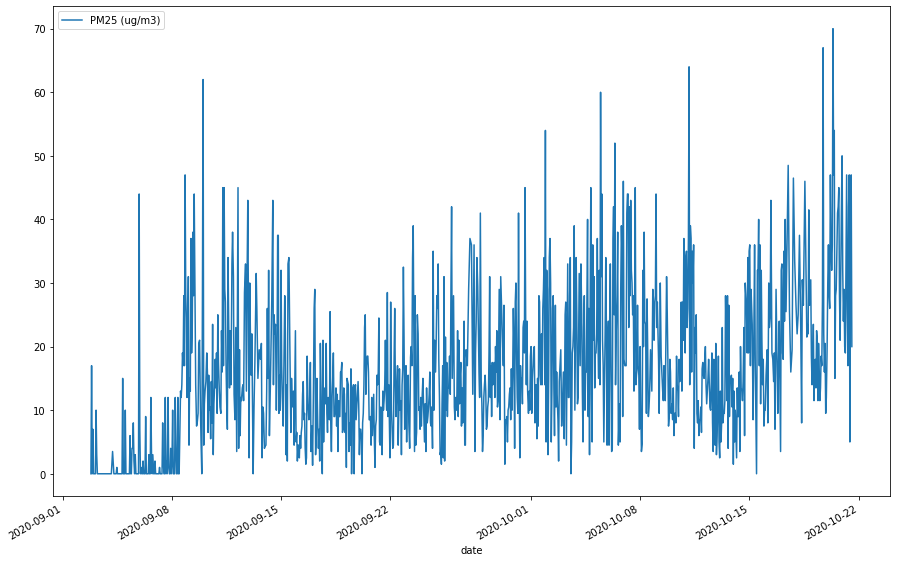

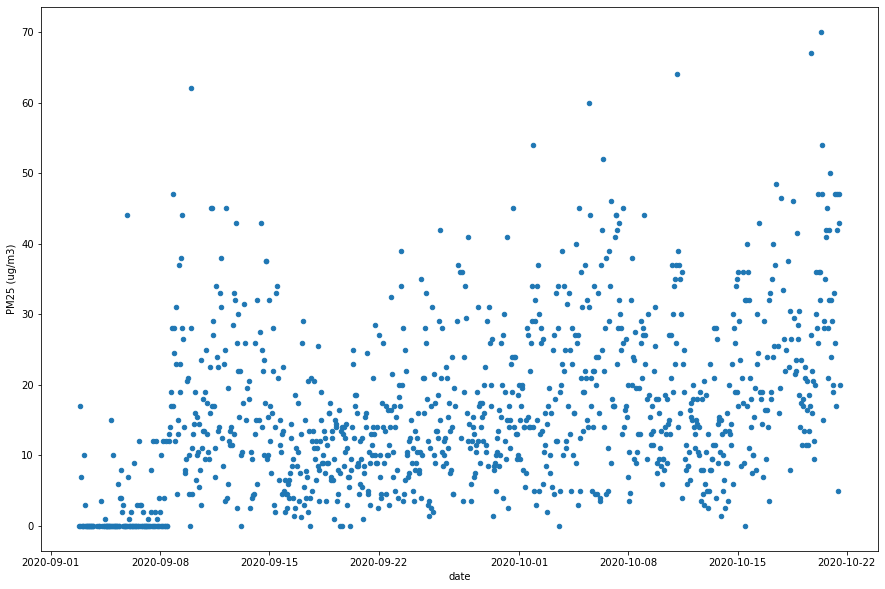

In [32]:
dataset.plot(kind = 'line', x='date', y='PM25 (ug/m3)', subplots=True, figsize=(15,10))
dataset.plot(kind = 'scatter', x='date', y='PM25 (ug/m3)', subplots=True, figsize=(15,10))

array([<AxesSubplot:xlabel='date', ylabel='CO (PPM)'>], dtype=object)

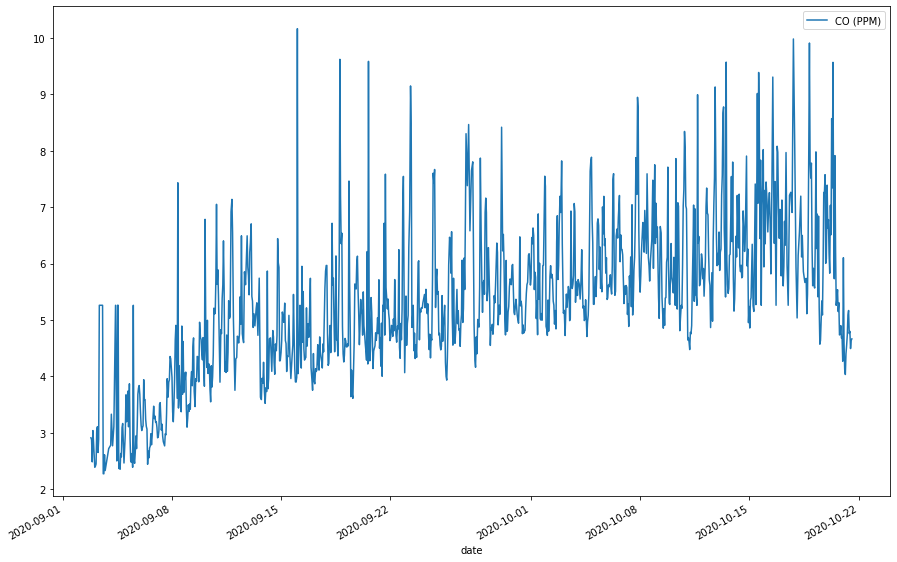

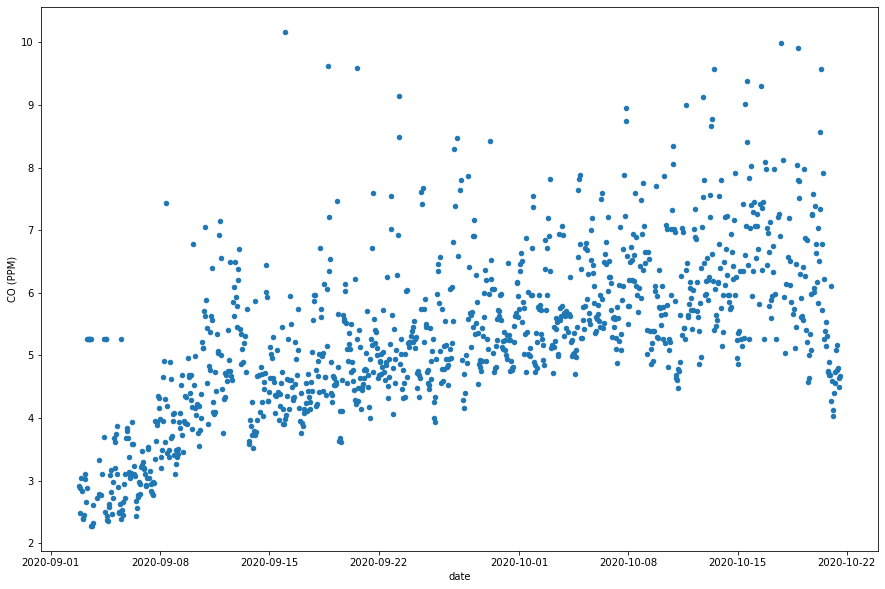

In [41]:
dataset.plot(kind = 'line', x='date', y='CO (PPM)', subplots=True, figsize=(15,10))
dataset.plot(kind = 'scatter', x='date', y='CO (PPM)', subplots=True, figsize=(15,10))

array([<AxesSubplot:xlabel='date', ylabel='NO2 (PPM)'>], dtype=object)

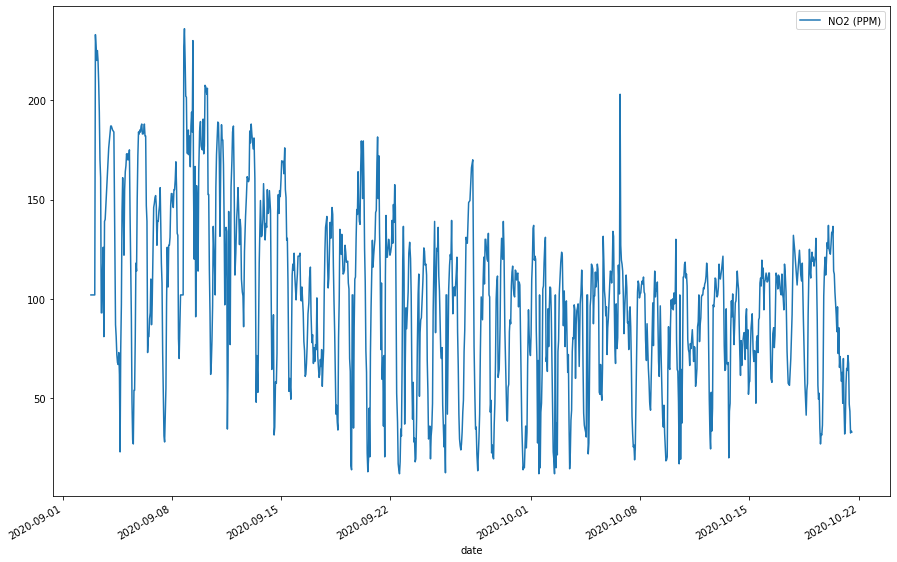

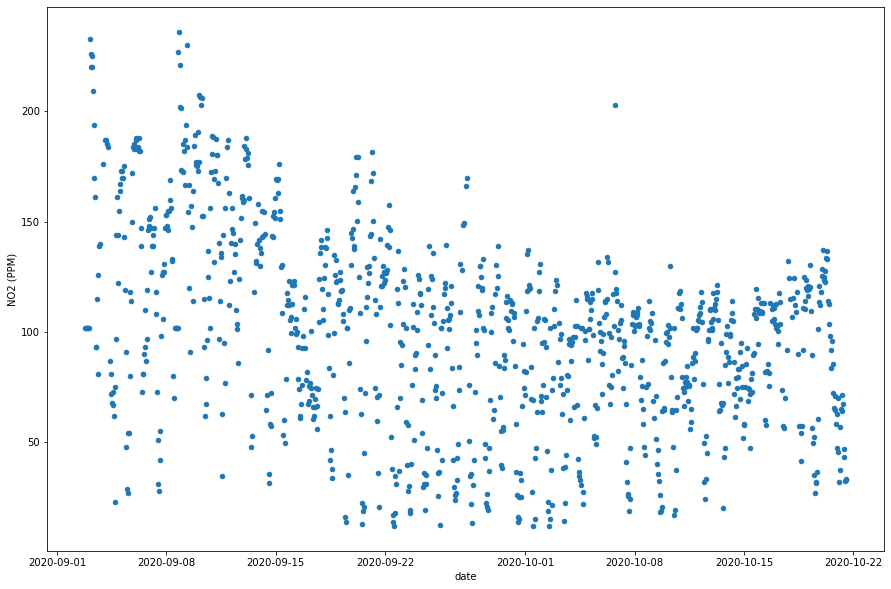

In [42]:
dataset.plot(kind = 'line', x='date', y='NO2 (PPM)', subplots=True, figsize=(15,10))
dataset.plot(kind = 'scatter', x='date', y='NO2 (PPM)', subplots=True, figsize=(15,10))

array([<AxesSubplot:xlabel='date', ylabel='O3 (PPB)'>], dtype=object)

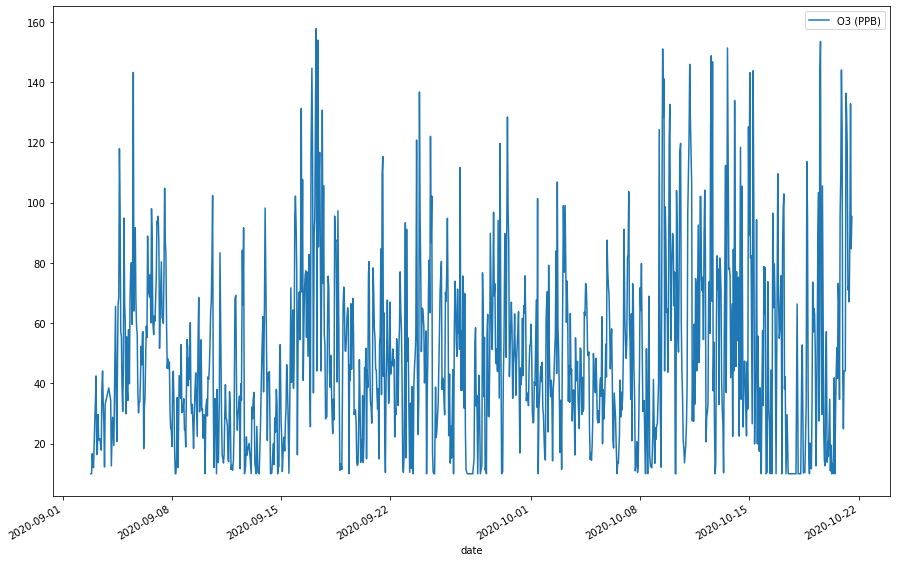

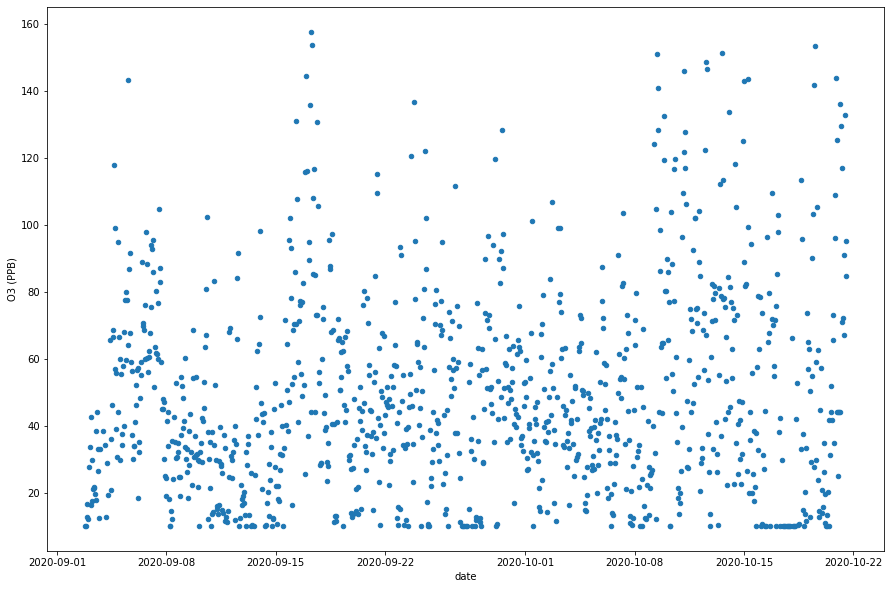

In [43]:
dataset.plot(kind = 'line', x='date', y='O3 (PPB)', subplots=True, figsize=(15,10))
dataset.plot(kind = 'scatter', x='date', y='O3 (PPB)', subplots=True, figsize=(15,10))

# Do statistical tests and do transformations if necessary
[Reference](https://machinelearningmastery.com/time-series-data-stationary-python/)

<AxesSubplot:>

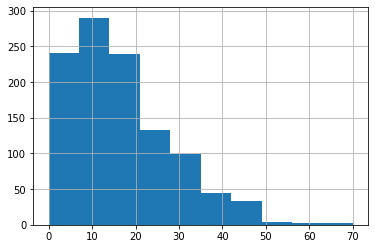

In [33]:
dataset['PM25 (ug/m3)'].hist()

<AxesSubplot:>

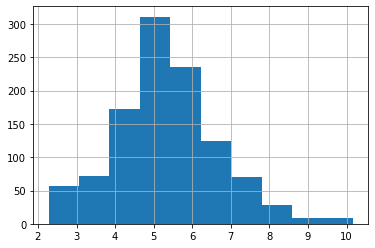

In [34]:
dataset['CO (PPM)'].hist()

<AxesSubplot:>

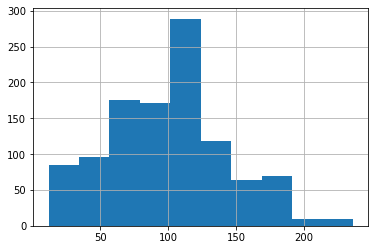

In [35]:
dataset['NO2 (PPM)'].hist()

<AxesSubplot:>

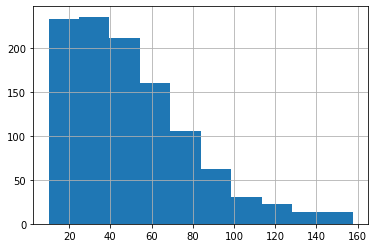

In [36]:
dataset['O3 (PPB)'].hist()

# Box plot

<AxesSubplot:>

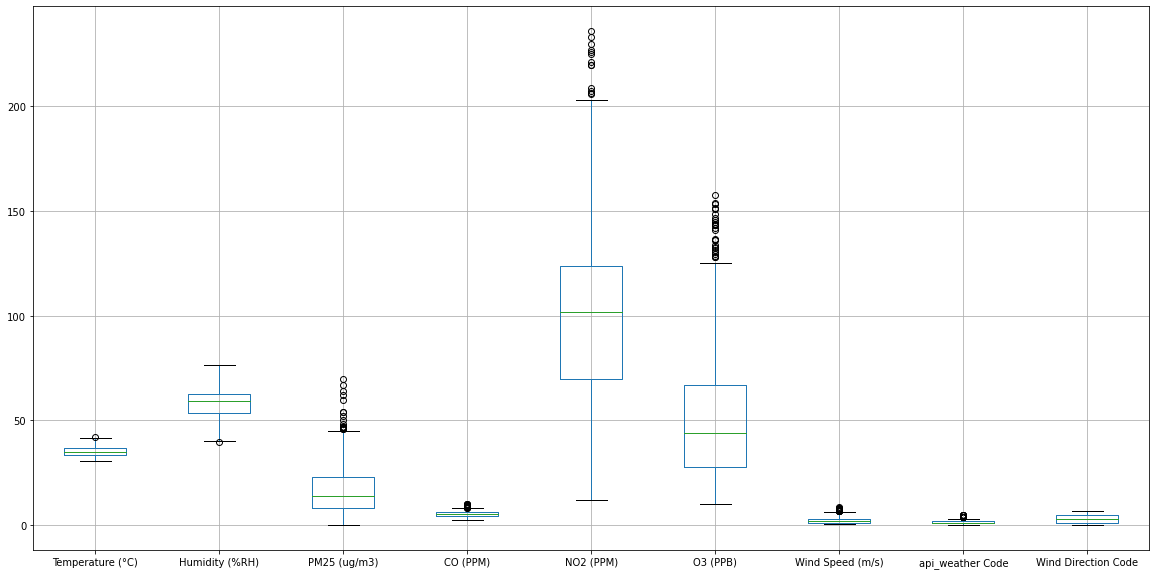

In [37]:
dataset.boxplot(figsize = (20,10))

## Shapiro-Wilk Test (test for normality)
[Reference for these tests](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

In [49]:
from scipy.stats import shapiro

### PM2.5

In [50]:
stat, p = shapiro(dataset['PM25 (ug/m3)'].values)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.940, p=0.000
Sample does not look Gaussian (reject H0)


### CO

In [51]:
stat, p = shapiro(dataset['CO (PPM)'].values)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.988, p=0.000
Sample does not look Gaussian (reject H0)


### NO2

In [52]:
stat, p = shapiro(dataset['NO2 (PPM)'].values)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.000
Sample does not look Gaussian (reject H0)


### O3

In [53]:
stat, p = shapiro(dataset['O3 (PPB)'].values)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.932, p=0.000
Sample does not look Gaussian (reject H0)


## D’Agostino’s K^2 Test (test for normality)

In [54]:
from scipy.stats import normaltest

### PM2.5

In [55]:
# normality test
stat, p = normaltest(dataset['PM25 (ug/m3)'].values)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=135.854, p=0.000
Sample does not look Gaussian (reject H0)


### CO

In [56]:
# normality test
stat, p = normaltest(dataset['CO (PPM)'].values)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=26.512, p=0.000
Sample does not look Gaussian (reject H0)


### NO2

In [57]:
# normality test
stat, p = normaltest(dataset['NO2 (PPM)'].values)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=10.528, p=0.005
Sample does not look Gaussian (reject H0)


### O3

In [58]:
# normality test
stat, p = normaltest(dataset['O3 (PPB)'].values)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=137.939, p=0.000
Sample does not look Gaussian (reject H0)


## Anderson-Darling Test (test for normality)

In [59]:
from scipy.stats import anderson

### PM2.5

In [60]:
# normality test
result = anderson(dataset['PM25 (ug/m3)'].values)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 14.406
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


### CO

In [61]:
# normality test
result = anderson(dataset['CO (PPM)'].values)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 2.979
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


### NO2

In [62]:
# normality test
result = anderson(dataset['NO2 (PPM)'].values)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 2.865
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


### O3

In [63]:
# normality test
result = anderson(dataset['O3 (PPB)'].values)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 16.003
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


## Augmented Dickey-Fuller test (test for stationarity)

In [64]:
from statsmodels.tsa.stattools import adfuller

### PM2.5

In [65]:
X = dataset['PM25 (ug/m3)'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -20.251880
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


E:\Users\Luis_Mercado\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


### CO

In [66]:
X = dataset['CO (PPM)'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.445061
p-value: 0.129420
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


### NO2

In [67]:
X = dataset['NO2 (PPM)'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.672095
p-value: 0.078993
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


### O3

In [68]:
X = dataset['O3 (PPB)'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.297889
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


# Choose a feature engineering technique

## [1] Split the dataset into hourly observations
e.g. create a dataset containing only the 11th hour observations
We only consider the 1st to the 12th hour observations plus one for the current hour observations.

In [ ]:
hours_count = 12

In [ ]:
hourly_df = list()
for nth_hour in range(1, hours_count + 1, 1):
    if nth_hour == hours_count:
        mask = dataset['date'].dt.hour % hours_count == 0
    else:
        mask = dataset['date'].dt.hour % hours_count == nth_hour
    df = dataset.loc[mask].copy()
    hourly_df.append(df)

In [ ]:
# check if the shapes are equal
for idx in range(len(hourly_df)):
    print(hourly_df[idx].shape)

In [ ]:
lowest_shape = 86
# balance the shapes of each hourly df
for idx in range(len(hourly_df)):
    while hourly_df[idx].shape[0] > lowest_shape:
        hourly_df[idx].drop(hourly_df[idx].tail(1).index,inplace=True) # drop last row

In [ ]:
for idx in range(len(hourly_df)):
    print(hourly_df[idx].shape)

## [2] Reformat the time series data to a supervised machine learning problem
That is, make the inputs (MFs and APCs) be related to its past inputs (features) in predicting its future outputs (label)

![Feature engineering of the data](figs/ml_test/feature_engineering.png)

In [42]:
from pandas import DataFrame
from pandas import concat

### Lagging series function helpers

In [ ]:
def transform_series_to_lag_dataframe(series, window_size=1, exclude_original=False):
    df_out = DataFrame()
    
    if window_size < 1:
        window_size = 1
    # concatenate the lagging series to the dataframe, 
    #   start from highest index to preserve order of the lagging series (current series should be at last column)
    for count in range(window_size, 0, -1):
        df_out[series.name + '(t-{})'.format(count)] = series.shift(count)
    # concatenate the original series, if desired
    if not exclude_original:
        df_out[series.name] = series
    return df_out

def transform_dataframe_to_lag_dataframe(dataframe, include_columns=None, window_size=1, drop_nan=True):
    df_out = DataFrame()
    if window_size < 1:
        window_size = 1
    if include_columns is None:
        return dataframe
    # concatenate each lagging dataframe to the new dataframe
    for column in dataframe.columns:
        if column in include_columns:
            lag_df = transform_series_to_lag_dataframe(dataframe[column], window_size, exclude_original=False)
        else:
            lag_df = dataframe[column]
        df_out = concat([df_out,lag_df], axis=1)
    if drop_nan:
        df_out.dropna(inplace=True)
    return df_out

In [ ]:
sv_data =  transform_dataframe_to_lag_dataframe(dataset, 
                                                include_columns=['Temperature (°C)', 'Humidity (%RH)', 'PM25 (ug/m3)',
                                                                 'CO (PPM)', 'NO2 (PPM)', 'O3 (PPB)',
                                                                 'Wind Speed (m/s)', 'Wind Direction Code', 'api_weather Code'
                                                                ], window_size=12, drop_nan=True)

### Leading series function helpers

In [43]:
def transform_series_to_lead_dataframe(series, forecast_size=1, exclude_original=False):
    df_out = DataFrame()
    
    if forecast_size < 1:
        forecast_size = 1
    # concatenate the original series, if desired
    if not exclude_original:
        df_out[series.name] = series
    # concatenate the leading series to the dataframe, 
    #   start from lowest index to preserve order of the leading series (current series should be at first column)
    for count in range(1, forecast_size + 1, 1):
        df_out[series.name + '(t+{})'.format(count)] = series.shift(-count)
    return df_out

def transform_dataframe_to_lead_dataframe(dataframe, include_columns=None, forecast_size=1, drop_nan=True):
    df_out = DataFrame()
    if forecast_size < 1:
        forecast_size = 1
    if include_columns is None:
        return dataframe
    # concatenate each leading dataframe to the new dataframe
    for column in dataframe.columns:
        if column in include_columns:
            lag_df = transform_series_to_lead_dataframe(dataframe[column], forecast_size, exclude_original=False)
        else:
            lag_df = dataframe[column]
        df_out = concat([df_out,lag_df], axis=1)
    if drop_nan:
        df_out.dropna(inplace=True)
    return df_out

In [44]:
sv_data =  transform_dataframe_to_lead_dataframe(dataset, 
                                                include_columns=['Temperature (°C)', 'Humidity (%RH)', 'PM25 (ug/m3)',
                                                                 'CO (PPM)', 'NO2 (PPM)', 'O3 (PPB)',
                                                                 'Wind Speed (m/s)', 'Wind Direction Code', 'api_weather Code'
                                                                ], forecast_size=12, drop_nan=True)

In [45]:
for col in sv_data.columns:
    print(col)

Temperature (°C)
Temperature (°C)(t+1)
Temperature (°C)(t+2)
Temperature (°C)(t+3)
Temperature (°C)(t+4)
Temperature (°C)(t+5)
Temperature (°C)(t+6)
Temperature (°C)(t+7)
Temperature (°C)(t+8)
Temperature (°C)(t+9)
Temperature (°C)(t+10)
Temperature (°C)(t+11)
Temperature (°C)(t+12)
Humidity (%RH)
Humidity (%RH)(t+1)
Humidity (%RH)(t+2)
Humidity (%RH)(t+3)
Humidity (%RH)(t+4)
Humidity (%RH)(t+5)
Humidity (%RH)(t+6)
Humidity (%RH)(t+7)
Humidity (%RH)(t+8)
Humidity (%RH)(t+9)
Humidity (%RH)(t+10)
Humidity (%RH)(t+11)
Humidity (%RH)(t+12)
PM25 (ug/m3)
PM25 (ug/m3)(t+1)
PM25 (ug/m3)(t+2)
PM25 (ug/m3)(t+3)
PM25 (ug/m3)(t+4)
PM25 (ug/m3)(t+5)
PM25 (ug/m3)(t+6)
PM25 (ug/m3)(t+7)
PM25 (ug/m3)(t+8)
PM25 (ug/m3)(t+9)
PM25 (ug/m3)(t+10)
PM25 (ug/m3)(t+11)
PM25 (ug/m3)(t+12)
CO (PPM)
CO (PPM)(t+1)
CO (PPM)(t+2)
CO (PPM)(t+3)
CO (PPM)(t+4)
CO (PPM)(t+5)
CO (PPM)(t+6)
CO (PPM)(t+7)
CO (PPM)(t+8)
CO (PPM)(t+9)
CO (PPM)(t+10)
CO (PPM)(t+11)
CO (PPM)(t+12)
NO2 (PPM)
NO2 (PPM)(t+1)
NO2 (PPM)(t+2)
NO2 (P

# Let's finalize the data, at this point, most of the preprocessing is complete, the rest will be done based on the machine learning model

In [46]:
# remove the date column (if time series is used)
sv_data.drop(['date'], axis=1, inplace=True)

In [ ]:
# remove the date column (if hourly observations is used)
for idx in range(len(hourly_df)):
    hourly_df[idx].drop(['date'], axis=1, inplace=True)

# Machine Learning begins...
Unfortunately, most models only support one output with multiple inputs, but we have four. So we have to make this model four times.

- y, target value/predictor
- x, dependent values

## let's get the metrics here: root mean squared error  and plcc (correlation coefficient)

In [47]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [48]:
# for saving the model to a file
import joblib

## [1] If the hourly observations feature engineering technique is used...

We create a model for each hourly observation where the current hourly observation is the input feature and the next hourly observation is the label.

In [ ]:
targ_df = hourly_df[0]
label_df = hourly_df[1]

In [ ]:
# APCs
pm25_idx = label_df.columns.get_loc('PM25 (ug/m3)')
co_idx   = label_df.columns.get_loc('CO (PPM)')
no2_idx   = label_df.columns.get_loc('NO2 (PPM)')
o3_idx   = label_df.columns.get_loc('O3 (PPB)')
# MFs
temp_idx = label_df.columns.get_loc('Temperature (°C)')
hum_idx = label_df.columns.get_loc('Humidity (%RH)')
wind_speed_idx = label_df.columns.get_loc('Wind Speed (m/s)')
wind_dir_idx = label_df.columns.get_loc('Wind Direction Code')
weather_idx = label_df.columns.get_loc('api_weather Code')

In [ ]:
df_x = targ_df
df_y_pm25 = label_df.iloc[:,pm25_idx]
df_y_co   = label_df.iloc[:,co_idx]
df_y_no2  = label_df.iloc[:,no2_idx]
df_y_o3   = label_df.iloc[:,o3_idx]

### Split the dataset into its training and testing/validation components

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y_co, test_size=0.2)

## [2] If the time series feature engineering technique is used...

In [49]:
# get the leading values for each MF and APC for each tick
cols = [val for val in dataset.columns.values if val != 'date']
dataset_at_time_idxs = {}

# leading
for time in range(1, 13, 1):
    dataset_at_time_idxs['t+{}'.format(time)] = [
        sv_data.columns.get_loc('{}(t+{})'.format(col_name, time)) for col_name in cols]
    
# formulate the dataset for each tick
dataset_at_time = {}
for time_step, dataset_idxs in dataset_at_time_idxs.items():
    dataset_at_time[time_step] = sv_data.iloc[:, dataset_idxs]

In [50]:
# get input columns excluding leading columns
input_cols = [sv_data.columns.get_loc(col) for col in sv_data.columns if 't+' not in col ]

In [51]:
input_cols

[0, 13, 26, 39, 52, 65, 78, 91, 104]

In [52]:
# input features
df_x = sv_data.iloc[:, input_cols]

In [53]:
df_x

Temperature (°C)  Humidity (%RH)  PM25 (ug/m3)  CO (PPM)  NO2 (PPM)  \
0                36.10            58.7           0.0    2.9130      102.0   
3                35.70            59.3          17.0    2.8770      102.0   
6                35.00            59.4           0.0    2.4860      102.0   
9                35.10            59.1           7.0    3.0410      102.0   
12               34.70            60.0           0.0    2.8330      102.0   
...                ...             ...           ...       ...        ...   
3213             32.45            66.4          42.0    4.6815       58.5   
3216             32.20            66.3          50.0    4.6935       63.0   
3219             32.25            65.4          32.0    4.2705       47.5   
3222             32.10            65.4          24.0    6.1050       70.0   
3225             32.00            64.7          29.0    4.5865       45.5   

      O3 (PPB)  Wind Speed (m/s)  api_weather Code  Wind Direction Code  
0      10.0000               4.1                 1                    7  
3      10.0000               3.6                 1                    7  
6      16.6630               2.6                 1                    7  
9      12.6230               2.6                 1                    6  
12     12.0200               1.5                 1                    7  
...        ...               ...               ...                  ...  
3213  144.0095               3.1                 2                    6  
3216  125.4170               3.1                 2                    6  
3219   44.1160               3.1                 2                    6  
3222   24.8970               4.1                 2                    6  
3225   44.1160               3.1                 2                    6  

[1076 rows x 9 columns]

### Split the dataset into its training and testing/validation components

In [54]:
# import library for time series data
from sktime.forecasting.model_selection import temporal_train_test_split

In [55]:
# this splitting technique only applies to unordered, independent observations, time series data depend on past observations
# x_train, x_test, y_train, y_test = train_test_split(df_x, df_y_pm25, test_size=0.2)

# input/features (present)
x_train_pres, x_test_pres = temporal_train_test_split(df_x, test_size=0.2)

# input/features (future) or expected output/labels
xy_train_at_time, xy_test_at_time = {}, {}
for time, data_at_time in dataset_at_time.items():
    xy_train_at_time[time], xy_test_at_time[time] = temporal_train_test_split(data_at_time, test_size=0.2)

In [83]:
x_train_pres.head()

Temperature (°C)  Humidity (%RH)  PM25 (ug/m3)  CO (PPM)  NO2 (PPM)  \
0               36.1            58.7           0.0     2.913      102.0   
3               35.7            59.3          17.0     2.877      102.0   
6               35.0            59.4           0.0     2.486      102.0   
9               35.1            59.1           7.0     3.041      102.0   
12              34.7            60.0           0.0     2.833      102.0   

    O3 (PPB)  Wind Speed (m/s)  api_weather Code  Wind Direction Code  
0     10.000               4.1                 1                    7  
3     10.000               3.6                 1                    7  
6     16.663               2.6                 1                    7  
9     12.623               2.6                 1                    6  
12    12.020               1.5                 1                    7

In [84]:
x_test_pres.head()

Temperature (°C)  Humidity (%RH)  PM25 (ug/m3)  CO (PPM)  NO2 (PPM)  \
2580             32.05           64.15          39.0    4.7815       77.5   
2583             32.00           64.75          37.0    4.7555       75.0   
2586             32.15           64.90          16.0    4.9005       79.5   
2589             32.80           64.25          35.0    5.6455       84.5   
2592             33.60           63.00          30.0    6.2620       77.5   

      O3 (PPB)  Wind Speed (m/s)  api_weather Code  Wind Direction Code  
2580  127.9110               3.6                 1                    7  
2583  117.1715               2.1                 1                    7  
2586  106.2665               1.5                 1                    7  
2589   27.5220               1.5                 2                    6  
2592   47.4945               1.5                 2                    6

In [85]:
xy_train_at_time.keys()

dict_keys(['t+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8', 't+9', 't+10', 't+11', 't+12'])

In [86]:
xy_train_at_time['t+1'].head()

Temperature (°C)(t+1)  Humidity (%RH)(t+1)  PM25 (ug/m3)(t+1)  \
0                    35.7                 59.3               17.0   
3                    35.0                 59.4                0.0   
6                    35.1                 59.1                7.0   
9                    34.7                 60.0                0.0   
12                   34.6                 59.2                0.0   

    CO (PPM)(t+1)  NO2 (PPM)(t+1)  O3 (PPB)(t+1)  Wind Speed (m/s)(t+1)  \
0           2.877           102.0         10.000                    3.6   
3           2.486           102.0         16.663                    2.6   
6           3.041           102.0         12.623                    2.6   
9           2.833           102.0         12.020                    1.5   
12          2.390           102.0         27.578                    1.5   

    api_weather Code(t+1)  Wind Direction Code(t+1)  
0                     1.0                       7.0  
3                     1.0                       7.0  
6                     1.0                       6.0  
9                     1.0                       7.0  
12                    1.0                       6.0

In [87]:
xy_test_at_time.keys()

dict_keys(['t+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8', 't+9', 't+10', 't+11', 't+12'])

In [88]:
xy_test_at_time['t+1'].head()

Temperature (°C)(t+1)  Humidity (%RH)(t+1)  PM25 (ug/m3)(t+1)  \
2580                  32.00                64.75               37.0   
2583                  32.15                64.90               16.0   
2586                  32.80                64.25               35.0   
2589                  33.60                63.00               30.0   
2592                  34.80                60.60               36.0   

      CO (PPM)(t+1)  NO2 (PPM)(t+1)  O3 (PPB)(t+1)  Wind Speed (m/s)(t+1)  \
2580         4.7555            75.0       117.1715                    2.1   
2583         4.9005            79.5       106.2665                    1.5   
2586         5.6455            84.5        27.5220                    1.5   
2589         6.2620            77.5        47.4945                    1.5   
2592         7.0385            68.5        27.4445                    1.5   

      api_weather Code(t+1)  Wind Direction Code(t+1)  
2580                    1.0                       7.0  
2583                    1.0                       7.0  
2586                    2.0                       6.0  
2589                    2.0                       6.0  
2592                    1.0                       6.0

## Build the predictor class

In [56]:
class Predictor:
    def __init__(self, model_type, predictors = None):
        if model_type == 'direct' or model_type == 'recurrent':
            self.model_type = model_type
        else:
            self.model_type = 'recurrent'
        self.model_list = list()
        self.predictors = predictors
        if predictors:
            self._build_model()
    def predict(self, inputs, time_step):
        if len(self.model_list) == 0:
            return None
        if self.model_type == 'direct':
            if time_step > len(self.model_list):
                time_step = len(self.model_list)
            elif time_step <= 0:
                time_step = 1
            return self.model_list[time_step - 1].predict(inputs)
        elif self.model_type == 'recurrent':
            if time_step > len(self.model_list):
                time_step = len(self.model_list)
            elif time_step <= 0:
                time_step = 1
            preds = None
            for idx in range(time_step):
                if idx == 0:
                    preds = self.model_list[0].predict(inputs)
                else:
                    preds = self.model_list[idx].predict(preds)
            return preds
        return None
    def _build_model(self):
        self.model_list = []
        for model in self.predictors.values():
            self.model_list.append(model)

## (Direct) Support Vector Regression (SVR)
- We **directly** associate the present MFs and APCs to the future MFs and APCs
- We use **'rbf'** as the kernel function for this SVM. Also, it requires normalization of data so we use StandardScaler

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
C = [ 1, 10, 100, 1000, 10000 ]
epsilon = [ 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5 ]
gamma = [ float('1e-{}'.format(x)) for x in range(1, 9) ] 
gamma.append('scale')
gamma.append('auto')

base_name = 'multidsvr__estimator'
dsvr_params_grid = {
    '{}__C'.format(base_name): C,
    '{}__epsilon'.format(base_name): epsilon,
    '{}__gamma'.format(base_name): gamma}

In [ ]:
def get_estimator():
    dsvr_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('normal', Normalizer()),
            ('multidsvr', MultiOutputRegressor(estimator=SVR(kernel='rbf')))])
    # determine best parameters using GridSearchCV
    cv_dsvr = GridSearchCV(
        estimator=dsvr_pipe,
        param_grid=dsvr_params_grid,
        cv = 5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    return cv_dsvr

In [ ]:
dsvr_at_time = {}
x_train = x_train_pres
for time_step, xy_train in xy_train_at_time.items():
    if 't-' in time_step:
        continue
    print('fitting model for time step ({})...'.format(time_step))
    dsvr = get_estimator()
    y_train = xy_train
    dsvr.fit(x_train, y_train)
    dsvr_at_time[time_step] = dsvr
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting models!')

In [ ]:
for optimizer in dsvr_at_time.values():
    print(optimizer.best_params_)

In [ ]:
# build predictor
predictor = Predictor('direct', dsvr_at_time)

### RMSE

In [ ]:
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    print('RMSE for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        rmse = mean_squared_error(y_test_time, y_pred_time, squared=False)
        print('Model({}): {}'.format(time_step, rmse))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### PLCC

In [ ]:
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    print('PLCC for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        plcc = pearsonr(y_test_time, y_pred_time)
        print('Model({}): {}'.format(time_step, plcc))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### Plot the performance of the model

In [ ]:
t = np.arange(0, len(x_test_pres))
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0

for label_name in cols:
    row, col = 0, 0
    fig, ax = plt.subplots(nrows=6,ncols=2, sharex=True, figsize=(10,15), dpi=150)
    fig.suptitle('{} Prediction Performance'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        ax[row][col].set_title('{}({})'.format(label_name, time_step))
        ax[row][col].plot(t, y_test_time, 'o')
        ax[row][col].plot(t, y_pred_time, 'x')
        if row < 5:
            row += 1
        else:
            row = 0
            col = col + 1 if col < 1 else 0
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0 

### Save the model for later use

In [ ]:
import os

In [ ]:
root_folder = 'ml_models'
model_name = 'direct_svr'
dir_name = os.path.join(root_folder, model_name)
model_to_dump = dsvr_at_time

In [ ]:
# save the model to disk
# try to create directory if not created yet
if not os.path.exists(dir_name):
    try:
        os.makedirs(dir_name)
    except OSError:
        print ("Creation of the directory %s failed" % directory)
    else:
        print ("Successfully created the directory %s" % directory)
for idx, model in enumerate(model_to_dump.values()):
    file_name = '{}_t{}_model.sav'.format(model_name, idx + 1)
    file_path = os.path.join(dir_name, file_name)
    joblib.dump(model, file_path)
    print('Dumped model into file ({})'.format(file_path))
print('done!')

### try to load model

In [ ]:
import os

In [ ]:
loaded_model = {}
root_folder = 'ml_models'
model_name = 'direct_svr'
dir_name = os.path.join(root_folder, model_name)

In [ ]:
for time_idx in range(1, 13, 1):
    file_name = '{}_t{}_model.sav'.format(model_name, time_idx)
    file_path = os.path.join(dir_name, file_name)
    if os.path.exists(file_path):
        loaded_model['t+{}'.format(time_idx)] = joblib.load(file_path)
        print('Loaded model from file {}'.format(file_name))
    else:
        continue
if loaded_model:
    dsvr_at_time = loaded_model
else:
    print('warning! nothing loaded in model.')
print('done!')

## Random Forest
Advantage of RF is that it supports multi-output regression without any configs required

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Model Tuning (Randomized)

In [ ]:
# Parameters for model tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
def get_estimator():
    rf_estimator = RandomForestRegressor()
    # random search best parameters using RandomizedSearchCV
    rf_random = RandomizedSearchCV(estimator = rf_estimator,
                                   param_distributions = random_grid, 
                                   n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    return rf_random

In [ ]:
# test using random search
rf_at_time = {}
for time_step, xy_train in xy_train_at_time.items():
    rf_optimizer = get_estimator()
    x_train = None
    if time_step == 't+1':
        x_train = x_train_pres
    else:
        prev_time = int(time_step.split('+')[1]) - 1
        prev_time_step = 't+{}'.format(prev_time)
        x_train = xy_train_at_time[prev_time_step]
    y_train = xy_train
    print('fitting model for time step ({})...'.format(time_step)) 
    rf_optimizer.fit(x_train, y_train)
    rf_at_time[time_step] = rf_optimizer
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting all models!')

In [ ]:
# see best parameters
for time_step, optimizer in rf_at_time.items():
    print('{} : {}'.format(time_step, optimizer.best_params_))

### Model Tuning (GridSearch, reduced parameters after doing randomized tuning)

In [ ]:
# narrowed down parameters for gridsearch based on RandomSearchCv results
n_estimators = [int(x) for x in np.linspace(start = 800, stop = 2000, num = 10)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(90, 160, num = 8)]

# Create the random grid
gs_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [ ]:
def get_estimator():
    rf_estimator = RandomForestRegressor(min_samples_split = 2, min_samples_leaf = 1, 
                                        bootstrap = True)
    # random search best parameters using RandomizedSearchCV
    rf_gs = GridSearchCV(estimator = rf_estimator, param_grid = gs_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
    return rf_gs

In [ ]:
rf_at_time = {}
for time_step, xy_train in xy_train_at_time.items():
    rf_optimizer = get_estimator()
    x_train = None
    if time_step == 't+1':
        x_train = x_train_pres
    else:
        prev_time = int(time_step.split('+')[1]) - 1
        prev_time_step = 't+{}'.format(prev_time)
        x_train = xy_train_at_time[prev_time_step]
    y_train = xy_train
    print('fitting model for time step ({})...'.format(time_step)) 
    rf_optimizer.fit(x_train, y_train)
    rf_at_time[time_step] = rf_optimizer
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting all models!')

In [ ]:
rf_best_params_at_time = {}
# see best parameters
for time_step, optimizer in rf_at_time.items():
    rf_best_params_at_time[time_step] = optimizer.best_params_
    print('{} : {}'.format(time_step, optimizer.best_params_))

### Build and train final model with best parameters

In [ ]:
for time_step, xy_train in xy_train_at_time.items():
    rf = RandomForestRegressor(min_samples_split = 2, min_samples_leaf = 1, 
                                        bootstrap = True)
    rf.set_params(**rf_best_params_at_time[time_step])
    x_train = None
    if time_step == 't+1':
        x_train = x_train_pres
    else:
        prev_time = int(time_step.split('+')[1]) - 1
        prev_time_step = 't+{}'.format(prev_time)
        x_train = xy_train_at_time[prev_time_step]
    y_train = xy_train
    print('fitting model for time step ({})...'.format(time_step)) 
    rf.fit(x_train, y_train)
    rf_at_time[time_step] = rf
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting all models!')

In [ ]:
# build predictor
predictor = Predictor('recurrent', rf_at_time)

### RMSE

In [ ]:
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    print('RMSE for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        rmse = mean_squared_error(y_test_time, y_pred_time, squared=False)
        print('Model({}): {}'.format(time_step, rmse))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### PLCC

In [ ]:
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    print('PLCC for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        plcc = pearsonr(y_test_time, y_pred_time)
        print('Model({}): {}'.format(time_step, plcc))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### Plot the performance of the model

In [ ]:
t = np.arange(0, len(x_test_pres))
cols = [val for val in dataset.columns.values if val != 'date']
target_idx = 0
for label_name in cols:
    x_test = x_test_pres
    row, col = 0, 0
    fig, ax = plt.subplots(nrows=6,ncols=2, sharex=True, figsize=(10,15), dpi=150)
    fig.suptitle('{} Prediction Performance'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        ax[row][col].set_title('{}({})'.format(label_name, time_step))
        ax[row][col].plot(t, y_test_time, 'o')
        ax[row][col].plot(t, y_pred_time, 'x')
        if row < 5:
            row += 1
        else:
            row = 0
            col = col + 1 if col < 1 else 0
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### Save the model for later use

In [ ]:
import os

In [ ]:
root_folder = 'ml_models'
model_name = 'random_forest'
dir_name = os.path.join(root_folder, model_name)
model_to_dump = rf_at_time

In [ ]:
# save the model to disk
# try to create directory if not created yet
if not os.path.exists(dir_name):
    try:
        os.makedirs(dir_name)
    except OSError:
        print ("Creation of the directory %s failed" % directory)
    else:
        print ("Successfully created the directory %s" % directory)
for idx, model in enumerate(model_to_dump.values()):
    file_name = '{}_t{}_model.sav'.format(model_name, idx + 1)
    file_path = os.path.join(dir_name, file_name)
    joblib.dump(model, file_path)
    print('Dumped model into file ({})'.format(file_path))
print('done!')

### try to load model

In [ ]:
import os

In [ ]:
loaded_model = {}
root_folder = 'ml_models'
model_name = 'random_forest'
dir_name = os.path.join(root_folder, model_name)

In [ ]:
for time_idx in range(1, 13, 1):
    file_name = '{}_t{}_model.sav'.format(model_name, time_idx)
    file_path = os.path.join(dir_name, file_name)
    if os.path.exists(file_path):
        loaded_model['t+{}'.format(time_idx)] = joblib.load(file_path)
        print('Loaded model from file {}'.format(file_name))
    else:
        continue
if loaded_model:
    rf_at_time = loaded_model
else:
    print('warning! nothing loaded in model.')
print('done!')

## Stochastic Gradient Boosting (SGD Trees)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

### Model Tuning (Randomized)

In [ ]:
# loss function to use
loss = [ 'ls', 'lad', 'huber' ]
# learning rate shrinks the contribution of each tree
learning_rate = [ 0.1, 0.15, 0.2 ]
# the number of boosting stages to perform.
n_estimators = [ int(x) for x in np.linspace(start = 100, stop = 2000, num = 10) ]
# The fraction of samples to be used for fitting the individual base learners
subsample = [ 0.2, 0.4, 0.8, 0.9 ]
# The minimum number of samples required to split an internal node
min_samples_split = [ 2, 4, 8 ]
# The minimum number of samples required to be at a leaf node
min_samples_leaf = [ 1, 2, 4, 8 ]
# maximum depth of the individual regression estimators.
max_depth = [ int(x) for x in np.linspace(start = 3, stop = 30, num = 10) ]
# The number of features to consider when looking for the best split:
max_features = [ 'auto', 'sqrt', 'log2' ]

# Create the grid
estimator_name = 'sgb'
sgb_grid = {'{}__estimator__loss'.format(estimator_name): loss,
              '{}__estimator__learning_rate'.format(estimator_name): learning_rate,
               '{}__estimator__n_estimators'.format(estimator_name): n_estimators,
               '{}__estimator__subsample'.format(estimator_name): subsample,
               '{}__estimator__min_samples_split'.format(estimator_name): min_samples_split,
               '{}__estimator__min_samples_leaf'.format(estimator_name): min_samples_leaf,
               '{}__estimator__max_depth'.format(estimator_name): max_depth,
               '{}__estimator__max_features'.format(estimator_name): max_features
              }

In [ ]:
def get_estimator():
    sgb_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('sgb', MultiOutputRegressor(estimator=GradientBoostingRegressor()))])
    sgb_optimizer = RandomizedSearchCV(estimator = sgb_pipe,
                                   param_distributions = sgb_grid, 
                                   n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    return sgb_optimizer

In [ ]:
sgb_at_time = {}
for time_step, xy_train in xy_train_at_time.items():
    sgb_optimizer = get_estimator()
    x_train = None
    if time_step == 't+1':
        x_train = x_train_pres
    else:
        prev_time = int(time_step.split('+')[1]) - 1
        prev_time_step = 't+{}'.format(prev_time)
        x_train = xy_train_at_time[prev_time_step]
    y_train = xy_train
    print('fitting model for time step ({})...'.format(time_step)) 
    sgb_optimizer.fit(x_train, y_train)
    sgb_at_time[time_step] = sgb_optimizer
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting all models!')

In [ ]:
sgb_best_params_at_time = {}
# see best parameters
for time_step, optimizer in sgb_at_time.items():
    sgb_best_params_at_time[time_step] = optimizer.best_params_
    print('{} : {}'.format(time_step, optimizer.best_params_))

### Model Tuning (GridSearch, reduced parameters after doing randomized tuning)

In [ ]:
loss = [ 'ls', 'lad', 'huber' ]
learning_rate = [ 0.1 ]
n_estimators = [ int(x) for x in np.linspace(start = 700, stop = 1900, num = 10) ]
subsample = [ 0.8, 0.9 ]
min_samples_split = [ 2, 4, 8 ]
min_samples_leaf = [ 1, 2, 4, 8 ]
max_depth = [ int(x) for x in np.linspace(start = 3, stop = 30, num = 10) ]
max_features = [ 'auto', 'sqrt', 'log2' ]

estimator_name = 'sgb'
sgb_grid = {'{}__estimator__loss'.format(estimator_name): loss,
              '{}__estimator__learning_rate'.format(estimator_name): learning_rate,
               '{}__estimator__n_estimators'.format(estimator_name): n_estimators,
               '{}__estimator__subsample'.format(estimator_name): subsample,
               '{}__estimator__min_samples_split'.format(estimator_name): min_samples_split,
               '{}__estimator__min_samples_leaf'.format(estimator_name): min_samples_leaf,
               '{}__estimator__max_depth'.format(estimator_name): max_depth,
               '{}__estimator__max_features'.format(estimator_name): max_features
              }

In [ ]:
def get_estimator():
    sgb_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('sgb', MultiOutputRegressor(estimator=GradientBoostingRegressor()))])
    cv_sgb = GridSearchCV(
        estimator=sgb_pipe,
        param_grid=sgb_grid,
        cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    return cv_sgb

In [ ]:
sgb_at_time = {}
for time_step, xy_train in xy_train_at_time.items():
    sgb_optimizer = get_estimator()
    x_train = None
    if time_step == 't+1':
        x_train = x_train_pres
    else:
        prev_time = int(time_step.split('+')[1]) - 1
        prev_time_step = 't+{}'.format(prev_time)
        x_train = xy_train_at_time[prev_time_step]
    y_train = xy_train
    print('fitting model for time step ({})...'.format(time_step)) 
    sgb_optimizer.fit(x_train, y_train)
    sgb_at_time[time_step] = sgb_optimizer
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting all models!')

### Build and train final model with best parameters

In [ ]:
sgb_at_time = {}
for time_step, xy_train in xy_train_at_time.items():
    sgb = GradientBoostingRegressor()
    sgb_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('sgb', MultiOutputRegressor(estimator=sgb))])
    sgb_pipe.set_params(**sgb_best_params_at_time[time_step])
    x_train = None
    if time_step == 't+1':
        x_train = x_train_pres
    else:
        prev_time = int(time_step.split('+')[1]) - 1
        prev_time_step = 't+{}'.format(prev_time)
        x_train = xy_train_at_time[prev_time_step]
    y_train = xy_train
    print('fitting model for time step ({})...'.format(time_step)) 
    sgb_pipe.fit(x_train, y_train)
    sgb_at_time[time_step] = sgb_pipe
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting all models!')

In [ ]:
# build predictor
predictor = Predictor('recurrent', sgb_at_time)

### RMSE

In [ ]:
cols = [val for val in dataset.columns.values if val != 'date']
target_idx = 0
for label_name in cols:
    x_test = x_test_pres
    print('RMSE for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        rmse = mean_squared_error(y_test_time, y_pred_time, squared=False)
        print('Model({}): {}'.format(time_step, rmse))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### PLCC

In [ ]:
cols = [val for val in dataset.columns.values if val != 'date']
target_idx = 0
for label_name in cols:
    x_test = x_test_pres
    print('PLCC for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        plcc = pearsonr(y_test_time, y_pred_time)
        print('Model({}): {}'.format(time_step, plcc))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### Plot the performance of the model

In [ ]:
t = np.arange(0, len(x_test_pres))
cols = [val for val in dataset.columns.values if val != 'date']
target_idx = 0
for label_name in cols:
    x_test = x_test_pres
    row, col = 0, 0
    fig, ax = plt.subplots(nrows=6,ncols=2, sharex=True, figsize=(10,15), dpi=150)
    fig.suptitle('{} Prediction Performance'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        ax[row][col].set_title('{}({})'.format(label_name, time_step))
        ax[row][col].plot(t, y_test_time, 'o')
        ax[row][col].plot(t, y_pred_time, 'x')
        if row < 5:
            row += 1
        else:
            row = 0
            col = col + 1 if col < 1 else 0
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### Save the model for later use

In [ ]:
import os

In [ ]:
root_folder = 'ml_models'
model_name = 'sgb'
dir_name = os.path.join(root_folder, model_name)
model_to_dump = sgb_at_time

In [ ]:
# save the model to disk
# try to create directory if not created yet
if not os.path.exists(dir_name):
    try:
        os.makedirs(dir_name)
    except OSError:
        print ("Creation of the directory %s failed" % dir_name)
    else:
        print ("Successfully created the directory %s" % dir_name)
for idx, model in enumerate(model_to_dump.values()):
    file_name = '{}_t{}_model.sav'.format(model_name, idx + 1)
    file_path = os.path.join(dir_name, file_name)
    joblib.dump(model, file_path)
    print('Dumped model into file ({})'.format(file_path))
print('done!')

### try to load model

In [ ]:
import os

In [ ]:
loaded_model = {}
root_folder = 'ml_models'
model_name = 'sgb'
dir_name = os.path.join(root_folder, model_name)

In [ ]:
for time_idx in range(1, 13, 1):
    file_name = '{}_t{}_model.sav'.format(model_name, time_idx)
    file_path = os.path.join(dir_name, file_name)
    if os.path.exists(file_path):
        loaded_model['t+{}'.format(time_idx)] = joblib.load(file_path)
        print('Loaded model from file {}'.format(file_name))
    else:
        continue
if loaded_model:
    sgb_at_time = loaded_model
else:
    print('warning! nothing loaded in model.')
print('done!')

## Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Model Tuning (GridSearch)

In [ ]:
n_neighbors = [ int(x) for x in np.linspace( 2, 16, 9) ]
weights = [ 'uniform', 'distance' ]
algorithm = [ 'auto', 'ball_tree', 'kd_tree', 'brute' ]

nbr_params_grid = {
    'nbr__n_neighbors': n_neighbors,
    'nbr__weights': weights,
    'nbr__algorithm': algorithm
}

In [ ]:
def get_estimator():
    nbr_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('nbr', KNeighborsRegressor())])
    # determine best parameters using GridSearchCV
    cv_nbr = GridSearchCV(
        estimator=nbr_pipe,
        param_grid=nbr_params_grid,
        cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    return cv_nbr

In [ ]:
nbr_at_time = {}
for time_step, xy_train in xy_train_at_time.items():
    nbr_optimizer = get_estimator()
    x_train = None
    if time_step == 't+1':
        x_train = x_train_pres
    else:
        prev_time = int(time_step.split('+')[1]) - 1
        prev_time_step = 't+{}'.format(prev_time)
        x_train = xy_train_at_time[prev_time_step]
    y_train = xy_train
    print('fitting model for time step ({})...'.format(time_step)) 
    nbr_optimizer.fit(x_train, y_train)
    nbr_at_time[time_step] = nbr_optimizer
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting all models!')

### Get best parameters

In [ ]:
nbr_best_params_at_time = {}
# see best parameters
for time_step, optimizer in nbr_at_time.items():
    nbr_best_params_at_time[time_step] = optimizer.best_params_
    print('{} : {}'.format(time_step, optimizer.best_params_))

### Build and train final model with best parameters

In [ ]:
nbr_at_time = {}
for time_step, xy_train in xy_train_at_time.items():
    nbr_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('nbr', KNeighborsRegressor())])
    nbr_pipe.set_params(**nbr_best_params_at_time[time_step])
    x_train = None
    if time_step == 't+1':
        x_train = x_train_pres
    else:
        prev_time = int(time_step.split('+')[1]) - 1
        prev_time_step = 't+{}'.format(prev_time)
        x_train = xy_train_at_time[prev_time_step]
    y_train = xy_train
    print('fitting model for time step ({})...'.format(time_step)) 
    nbr_pipe.fit(x_train, y_train)
    nbr_at_time[time_step] = nbr_pipe
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting all models!')

In [ ]:
# build predictor
predictor = Predictor('recurrent', nbr_at_time)

### RMSE

In [ ]:
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    print('RMSE for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        rmse = mean_squared_error(y_test_time, y_pred_time, squared=False)
        print('Model({}): {}'.format(time_step, rmse))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### PLCC

In [ ]:
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    print('PLCC for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        plcc = pearsonr(y_test_time, y_pred_time)
        print('Model({}): {}'.format(time_step, plcc))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### Plot the performance of the model

In [ ]:
t = np.arange(0, len(x_test))
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    x_test = x_test_pres
    row, col = 0, 0
    fig, ax = plt.subplots(nrows=6,ncols=2, sharex=True, figsize=(10,15), dpi=150)
    fig.suptitle('{} Prediction Performance'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        ax[row][col].set_title('{}({})'.format(label_name, time_step))
        ax[row][col].plot(t, y_test_time, 'o')
        ax[row][col].plot(t, y_pred_time, 'x')
        if row < 5:
            row += 1
        else:
            row = 0
            col = col + 1 if col < 1 else 0
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### Save the model for later use

In [ ]:
import os

In [ ]:
root_folder = 'ml_models'
model_name = 'nbr'
dir_name = os.path.join(root_folder, model_name)
model_to_dump = nbr_at_time

In [ ]:
# save the model to disk
# try to create directory if not created yet
if not os.path.exists(dir_name):
    try:
        os.makedirs(dir_name)
    except OSError:
        print ("Creation of the directory %s failed" % dir_name)
    else:
        print ("Successfully created the directory %s" % dir_name)
for idx, model in enumerate(model_to_dump.values()):
    file_name = '{}_t{}_model.sav'.format(model_name, idx + 1)
    file_path = os.path.join(dir_name, file_name)
    joblib.dump(model, file_path)
    print('Dumped model into file ({})'.format(file_path))
print('done!')

### try to load model

In [ ]:
import os

In [ ]:
loaded_model = {}
root_folder = 'ml_models'
model_name = 'nbr'
dir_name = os.path.join(root_folder, model_name)

In [ ]:
for time_idx in range(1, 13, 1):
    file_name = '{}_t{}_model.sav'.format(model_name, time_idx)
    file_path = os.path.join(dir_name, file_name)
    if os.path.exists(file_path):
        loaded_model['t+{}'.format(time_idx)] = joblib.load(file_path)
        print('Loaded model from file {}'.format(file_name))
    else:
        continue
if loaded_model:
    nbr_at_time = loaded_model
else:
    print('warning! nothing loaded in model.')
print('done!')

## Recurrent Support Vector Regression (R-SVR)
- We use MFs and APCs at (t - 1) + n in predicting the t + n  MFs and APCs
- We use 'rbf' kernel for consistency as in Direct SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

### Model Tuning (GridSearch)

In [ ]:
C = [ 10, 50, 100, 500, 1000, 5000, 10000, 15000 ]
epsilon = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.2, 1.5]
gamma = [ 0.0001, 0.0005, 0.001, 0.003, 0.005,  0.01 ]
gamma.append('scale')
gamma.append('auto')

base_name = 'multirsvr__estimator'
rsvr_params_grid = {
    '{}__C'.format(base_name): C,
    '{}__epsilon'.format(base_name): epsilon,
    '{}__gamma'.format(base_name): gamma}

In [ ]:
def get_estimator():
    rsvr_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('multirsvr', MultiOutputRegressor(estimator=SVR(kernel='rbf')))])
    # determine best parameters using GridSearchCV
    cv_rsvr = GridSearchCV(
        estimator=rsvr_pipe,
        param_grid=rsvr_params_grid,
        cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    return cv_rsvr

In [ ]:
rsvr_at_time = {}
for time_step, xy_train in xy_train_at_time.items():
    rsvr = get_estimator()
    x_train = None
    if time_step == 't+1':
        x_train = x_train_pres
    else:
        prev_time = int(time_step.split('+')[1]) - 1
        prev_time_step = 't+{}'.format(prev_time)
        x_train = xy_train_at_time[prev_time_step]
    y_train = xy_train
    print('fitting model for time step ({})...'.format(time_step))
    rsvr.fit(x_train, y_train)
    rsvr_at_time[time_step] = rsvr
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting models!')

### Get best parameters

In [ ]:
rsvr_best_params_at_time = {}
# see best parameters
for time_step, optimizer in rsvr_at_time.items():
    rsvr_best_params_at_time[time_step] = optimizer.best_params_
    print('{} : {}'.format(time_step, optimizer.best_params_))

### Train best model

In [ ]:
rsvr_at_time = {}
for time_step, xy_train in xy_train_at_time.items():
    svr = SVR(kernel='rbf')
    rsvr_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('multirsvr', MultiOutputRegressor(estimator=svr))])
    rsvr_pipe.set_params(**rsvr_best_params_at_time[time_step])
    x_train = None
    if time_step == 't+1':
        x_train = x_train_pres
    else:
        prev_time = int(time_step.split('+')[1]) - 1
        prev_time_step = 't+{}'.format(prev_time)
        x_train = xy_train_at_time[prev_time_step]
    y_train = xy_train
    print('fitting model for time step ({})...'.format(time_step)) 
    rsvr_pipe.fit(x_train, y_train)
    rsvr_at_time[time_step] = rsvr_pipe
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting all models!')

In [ ]:
# build predictor
predictor = Predictor('recurrent', rsvr_at_time)

### RMSE

In [ ]:
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    print('RMSE for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        rmse = mean_squared_error(y_test_time, y_pred_time, squared=False)
        print('Model({}): {}'.format(time_step, rmse))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### PLCC

In [ ]:
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    print('PLCC for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        plcc = pearsonr(y_test_time, y_pred_time)
        print('Model({}): {}'.format(time_step, plcc))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### Plot the performance of the model

In [ ]:
t = np.arange(0, len(x_test_pres))
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    row, col = 0, 0
    fig, ax = plt.subplots(nrows=6,ncols=2, sharex=True, figsize=(10,15), dpi=150)
    fig.suptitle('{} Prediction Performance'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        ax[row][col].set_title('{}({})'.format(label_name, time_step))
        ax[row][col].plot(t, y_test_time, 'o')
        ax[row][col].plot(t, y_pred_time, 'x')
        if row < 5:
            row += 1
        else:
            row = 0
            col = col + 1 if col < 1 else 0
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### Save the model for later use

In [ ]:
import os

In [ ]:
root_folder = 'ml_models'
model_name = 'rsvr'
dir_name = os.path.join(root_folder, model_name)
model_to_dump = rsvr_at_time

In [ ]:
# save the model to disk
# try to create directory if not created yet
if not os.path.exists(dir_name):
    try:
        os.makedirs(dir_name)
    except OSError:
        print ("Creation of the directory %s failed" % dir_name)
    else:
        print ("Successfully created the directory %s" % dir_name)
for idx, model in enumerate(model_to_dump.values()):
    file_name = '{}_t{}_model.sav'.format(model_name, idx + 1)
    file_path = os.path.join(dir_name, file_name)
    joblib.dump(model, file_path)
    print('Dumped model into file ({})'.format(file_path))
print('done!')

### try to load model

In [89]:
import os

In [90]:
loaded_model = {}
root_folder = 'ml_models'
model_name = 'rsvr'
dir_name = os.path.join(root_folder, model_name)

In [91]:
for time_idx in range(1, 13, 1):
    file_name = '{}_t{}_model.sav'.format(model_name, time_idx)
    file_path = os.path.join(dir_name, file_name)
    if os.path.exists(file_path):
        loaded_model['t+{}'.format(time_idx)] = joblib.load(file_path)
        print('Loaded model from file {}'.format(file_name))
    else:
        continue
if loaded_model:
    rsvr_at_time = loaded_model
else:
    print('warning! nothing loaded in model.')
print('done!')

Loaded model from file rsvr_t1_model.sav
Loaded model from file rsvr_t2_model.sav
Loaded model from file rsvr_t3_model.sav
Loaded model from file rsvr_t4_model.sav
Loaded model from file rsvr_t5_model.sav
Loaded model from file rsvr_t6_model.sav
Loaded model from file rsvr_t7_model.sav
Loaded model from file rsvr_t8_model.sav
Loaded model from file rsvr_t9_model.sav
Loaded model from file rsvr_t10_model.sav
Loaded model from file rsvr_t11_model.sav
Loaded model from file rsvr_t12_model.sav
done!


## Ensemble (5 Regressors)
Consists of 5 regressors:
- SVR
- R-SVR
- Random Forest
- SGD
- Nearest Neighbors

We take the mean of the predicted values of each regressor to get the final model's predicted value.

In [74]:
# learner models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
# final meta estimator
from sklearn.kernel_ridge import KernelRidge
# others
from mlxtend.regressor import StackingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer

### Best parameters

In [75]:
svr_best_params = {
    't+1' : {'C': 100, 'epsilon': 0.7, 'gamma': 0.003},
    't+2' : {'C': 100, 'epsilon': 0.7, 'gamma': 0.003},
    't+3' : {'C': 100, 'epsilon': 0.7, 'gamma': 0.003},
    't+4' : {'C': 500, 'epsilon': 1, 'gamma': 0.001},
    't+5' : {'C': 500, 'epsilon': 0.7, 'gamma': 0.001},
    't+6' : {'C': 500, 'epsilon': 0.5, 'gamma': 0.001},
    't+7' : {'C': 500, 'epsilon': 0.3, 'gamma': 0.001},
    't+8' : {'C': 500, 'epsilon': 1, 'gamma': 0.001},
    't+9' : {'C': 500, 'epsilon': 1, 'gamma': 0.001},
    't+10' : {'C': 500, 'epsilon': 0.9, 'gamma': 0.001},
    't+11' : {'C': 500, 'epsilon': 1, 'gamma': 0.001},
    't+12' : {'C': 500, 'epsilon': 0.3, 'gamma': 0.001}
}

In [76]:
rf_best_params = {
    't+1' : {'max_depth': 120, 'max_features': 'log2', 'n_estimators': 800},
    't+2' : {'max_depth': 130, 'max_features': 'log2', 'n_estimators': 1200},
    't+3' : {'max_depth': 90, 'max_features': 'log2', 'n_estimators': 800},
    't+4' : {'max_depth': 110, 'max_features': 'sqrt', 'n_estimators': 1600},
    't+5' : {'max_depth': 150, 'max_features': 'sqrt', 'n_estimators': 1333},
    't+6' : {'max_depth': 120, 'max_features': 'sqrt', 'n_estimators': 2000},
    't+7' : {'max_depth': 130, 'max_features': 'log2', 'n_estimators': 1200},
    't+8' : {'max_depth': 130, 'max_features': 'sqrt', 'n_estimators': 1333},
    't+9' : {'max_depth': 160, 'max_features': 'sqrt', 'n_estimators': 1866},
    't+10' : {'max_depth': 150, 'max_features': 'log2', 'n_estimators': 933},
    't+11' : {'max_depth': 120, 'max_features': 'sqrt', 'n_estimators': 1066},
    't+12' : {'max_depth': 160, 'max_features': 'sqrt', 'n_estimators': 1200}
}

In [77]:
sgb_best_params = {
    't+1' : {'subsample': 0.9, 'n_estimators': 1788, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 18, 'loss': 'huber', 'learning_rate': 0.1},
    't+2' : {'subsample': 0.9, 'n_estimators': 1788, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 18, 'loss': 'huber', 'learning_rate': 0.1},
    't+3' : {'subsample': 0.8, 'n_estimators': 733, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 12, 'loss': 'lad', 'learning_rate': 0.1},
    't+4' : {'subsample': 0.9, 'n_estimators': 1788, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 18, 'loss': 'huber', 'learning_rate': 0.1},
    't+5' : {'subsample': 0.9, 'n_estimators': 311, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 9, 'loss': 'lad', 'learning_rate': 0.1},
    't+6' : {'subsample': 0.8, 'n_estimators': 733, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 12, 'loss': 'lad', 'learning_rate': 0.1},
    't+7' : {'subsample': 0.9, 'n_estimators': 1788, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 18, 'loss': 'huber', 'learning_rate': 0.1},
    't+8' : {'subsample': 0.9, 'n_estimators': 311, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 9, 'loss': 'lad', 'learning_rate': 0.1},
    't+9' : {'subsample': 0.8, 'n_estimators': 733, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 12, 'loss': 'lad', 'learning_rate': 0.1},
    't+10' : {'subsample': 0.8, 'n_estimators': 733, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 12, 'loss': 'lad', 'learning_rate': 0.1},
    't+11' : {'subsample': 0.9, 'n_estimators': 1788, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 18, 'loss': 'huber', 'learning_rate': 0.1},
    't+12' : {'subsample': 0.8, 'n_estimators': 733, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 12, 'loss': 'lad', 'learning_rate': 0.1}
}

In [78]:
nbr_best_params = {
    't+1' : {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'distance'},
    't+2' : {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'distance'},
    't+3' : {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'distance'},
    't+4' : {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'distance'},
    't+5' : {'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'distance'},
    't+6' : {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'distance'},
    't+7' : {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'distance'},
    't+8' : {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'distance'},
    't+9' : {'algorithm': 'brute', 'n_neighbors': 16, 'weights': 'distance'},
    't+10': {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'distance'},
    't+11' : {'algorithm': 'brute', 'n_neighbors': 16, 'weights': 'distance'},
    't+12' : {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'distance'}
}

In [79]:
def get_best_model_at_time(model_name, time_step):
    best_model = None
    if model_name == 'svr':
        best_model = SVR(kernel='rbf')
        best_model.set_params(**svr_best_params[time_step])
    elif model_name == 'rf':
        best_model = RandomForestRegressor(min_samples_split = 2, min_samples_leaf = 1, 
                                        bootstrap = True)
        best_model.set_params(**rf_best_params[time_step])
    elif model_name == 'sgb':
        best_model = GradientBoostingRegressor()
        best_model.set_params(**sgb_best_params[time_step])
    elif model_name == 'nbr':
        best_model = KNeighborsRegressor()
        best_model.set_params(**nbr_best_params[time_step])
    return best_model

In [80]:
# get a stacking ensemble of models
def get_stacking_ensemble_at_time(learner_names, time_step):
    # define the base models
    learner_list = list()
    for learner_name in learner_names:
        best_model = get_best_model_at_time(learner_name, time_step)
        learner_list.append(best_model)
    # define meta learner model
    meta_learner = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 16, weights = 'distance')
    # define the stacking ensemble
    model = StackingRegressor(regressors=learner_list, meta_regressor=meta_learner, verbose = 2)
    return model

### Train best model

In [81]:
ensemble_at_time = {}
learning_model_names = ['svr', 'rf', 'sgb']
for time_step, xy_train in xy_train_at_time.items():
    stacker = get_stacking_ensemble_at_time(learning_model_names, time_step)
    stack_pipe = Pipeline([
        ('normalizer', Normalizer()),
        ('scaler', StandardScaler()),
        ('ensemble', stacker)
    ])
    ensemble_chain = MultiOutputRegressor(estimator=stack_pipe)
    
    x_train = None
    if time_step == 't+1':
        x_train = x_train_pres
    else:
        prev_time = int(time_step.split('+')[1]) - 1
        prev_time_step = 't+{}'.format(prev_time)
        x_train = xy_train_at_time[prev_time_step]
    y_train = xy_train
    
    print('fitting model for time step ({})...'.format(time_step))
    ensemble_chain.fit(x_train, y_train)
    ensemble_at_time[time_step] = ensemble_chain
    print('done fitting model for time step ({})'.format(time_step))
print('done fitting models!')

fitting model for time step (t+1)...
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=100, epsilon=0.7, gamma=0.003)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=120, max_features='log2', n_estimators=800)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='huber', max_depth=18, max_features='auto',
                          min_samples_leaf=8, n_estimators=1788, subsample=0.9)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=100, epsilon=0.7, gamma=0.003)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=120, max_features='log2', n_estimators=800)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='huber', max_depth=18, max_features='auto',
                          min_samples_leaf=8, n_estimators=1788, subsample=0.9)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=100, epsilon=0.7, gamma=0.003)
Fitting regressor2: randomfo

Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=100, epsilon=0.7, gamma=0.003)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=90, max_features='log2', n_estimators=800)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='lad', max_depth=12, max_features='log2',
                          min_samples_leaf=8, min_samples_split=8,
                          n_estimators=733, subsample=0.8)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=100, epsilon=0.7, gamma=0.003)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=90, max_features='log2', n_estimators=800)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='lad', max_depth=12, max_features='log2',
                          min_samples_leaf=8, min_samples_split=8,
                          n_estimators=733, subsample=0.8)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=100, epsil

Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='lad', max_depth=9, max_features='auto',
                          min_samples_leaf=2, n_estimators=311, subsample=0.9)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=500, epsilon=0.7, gamma=0.001)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=150, max_features='sqrt', n_estimators=1333)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='lad', max_depth=9, max_features='auto',
                          min_samples_leaf=2, n_estimators=311, subsample=0.9)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=500, epsilon=0.7, gamma=0.001)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=150, max_features='sqrt', n_estimators=1333)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='lad', max_depth=9, max_features='auto',
                          min_samples_

Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=500, epsilon=0.3, gamma=0.001)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=130, max_features='log2', n_estimators=1200)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='huber', max_depth=18, max_features='auto',
                          min_samples_leaf=8, n_estimators=1788, subsample=0.9)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=500, epsilon=0.3, gamma=0.001)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=130, max_features='log2', n_estimators=1200)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='huber', max_depth=18, max_features='auto',
                          min_samples_leaf=8, n_estimators=1788, subsample=0.9)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=500, epsilon=0.3, gamma=0.001)
Fitting regressor2: randomforestregressor (2/3)
RandomForestReg

Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=500, epsilon=1, gamma=0.001)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=160, max_features='sqrt', n_estimators=1866)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='lad', max_depth=12, max_features='log2',
                          min_samples_leaf=8, min_samples_split=8,
                          n_estimators=733, subsample=0.8)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=500, epsilon=1, gamma=0.001)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=160, max_features='sqrt', n_estimators=1866)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='lad', max_depth=12, max_features='log2',
                          min_samples_leaf=8, min_samples_split=8,
                          n_estimators=733, subsample=0.8)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=500, epsil

Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='huber', max_depth=18, max_features='auto',
                          min_samples_leaf=8, n_estimators=1788, subsample=0.9)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=500, epsilon=1, gamma=0.001)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=120, max_features='sqrt', n_estimators=1066)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='huber', max_depth=18, max_features='auto',
                          min_samples_leaf=8, n_estimators=1788, subsample=0.9)
Fitting 3 regressors...
Fitting regressor1: svr (1/3)
SVR(C=500, epsilon=1, gamma=0.001)
Fitting regressor2: randomforestregressor (2/3)
RandomForestRegressor(max_depth=120, max_features='sqrt', n_estimators=1066)
Fitting regressor3: gradientboostingregressor (3/3)
GradientBoostingRegressor(loss='huber', max_depth=18, max_features='auto',
                          min_s

In [82]:
# build predictor
predictor = Predictor('recurrent', ensemble_at_time)

### RMSE

In [83]:
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    print('RMSE for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        rmse = mean_squared_error(y_test_time, y_pred_time, squared=False)
        print('Model({}): {}'.format(time_step, rmse))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

RMSE for Temperature (°C)
Model(t+1): 0.9669792262992959
Model(t+2): 1.321553045472887
Model(t+3): 1.7504104727290541
Model(t+4): 2.082001173710799
Model(t+5): 2.3374902246654847
Model(t+6): 2.6079307561597993
Model(t+7): 2.7983083830786972
Model(t+8): 2.877790922344097
Model(t+9): 3.0488936476481494
Model(t+10): 3.0727316788694004
Model(t+11): 3.324700349295296
Model(t+12): 3.3927145155199785
RMSE for Humidity (%RH)
Model(t+1): 2.3612029278415485
Model(t+2): 3.327372192103028
Model(t+3): 4.385306231509395
Model(t+4): 5.2486673187820045
Model(t+5): 5.9976975371304215
Model(t+6): 6.478786789723302
Model(t+7): 6.9449835293656905
Model(t+8): 7.156465537410091
Model(t+9): 7.575048090585099
Model(t+10): 7.752306455439989
Model(t+11): 8.112615100066348
Model(t+12): 8.452271947427464
RMSE for PM25 (ug/m3)
Model(t+1): 12.426428060979502
Model(t+2): 11.681219627424674
Model(t+3): 12.41107591667123
Model(t+4): 12.617990735309883
Model(t+5): 12.967739641653063
Model(t+6): 12.935312359133215
Model

### PLCC

In [84]:
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
for label_name in cols:
    print('PLCC for {}'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        plcc = pearsonr(y_test_time, y_pred_time)
        print('Model({}): {}'.format(time_step, plcc))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

PLCC for Temperature (°C)
Model(t+1): (0.8844284579838142, 9.083960290801582e-73)
Model(t+2): (0.7626520647825986, 2.283150055562803e-42)
Model(t+3): (0.5812296172403527, 6.484971591940261e-21)
Model(t+4): (0.4306929910183388, 3.623962925148087e-11)
Model(t+5): (0.30012582155279705, 7.147036827511228e-06)
Model(t+6): (0.17043442766820918, 0.012117225339850535)
Model(t+7): (0.09548822619976656, 0.1619812995733002)
Model(t+8): (0.05870056369835347, 0.39064227761920156)
Model(t+9): (0.00039825427156599095, 0.9953570115273213)
Model(t+10): (-0.049947811982563976, 0.4652212580226511)
Model(t+11): (-0.12499239375267981, 0.06672180266997312)
Model(t+12): (-0.11198496109590636, 0.10070335949171193)
PLCC for Humidity (%RH)
Model(t+1): (0.8844713715398582, 8.75093693135591e-73)
Model(t+2): (0.7641438886688601, 1.2706070820855673e-42)
Model(t+3): (0.5929189256855697, 6.763595528634394e-22)
Model(t+4): (0.42087140057501976, 1.105285989786991e-10)
Model(t+5): (0.2891763627506317, 1.574788968623211e

### Plot the performance of the model

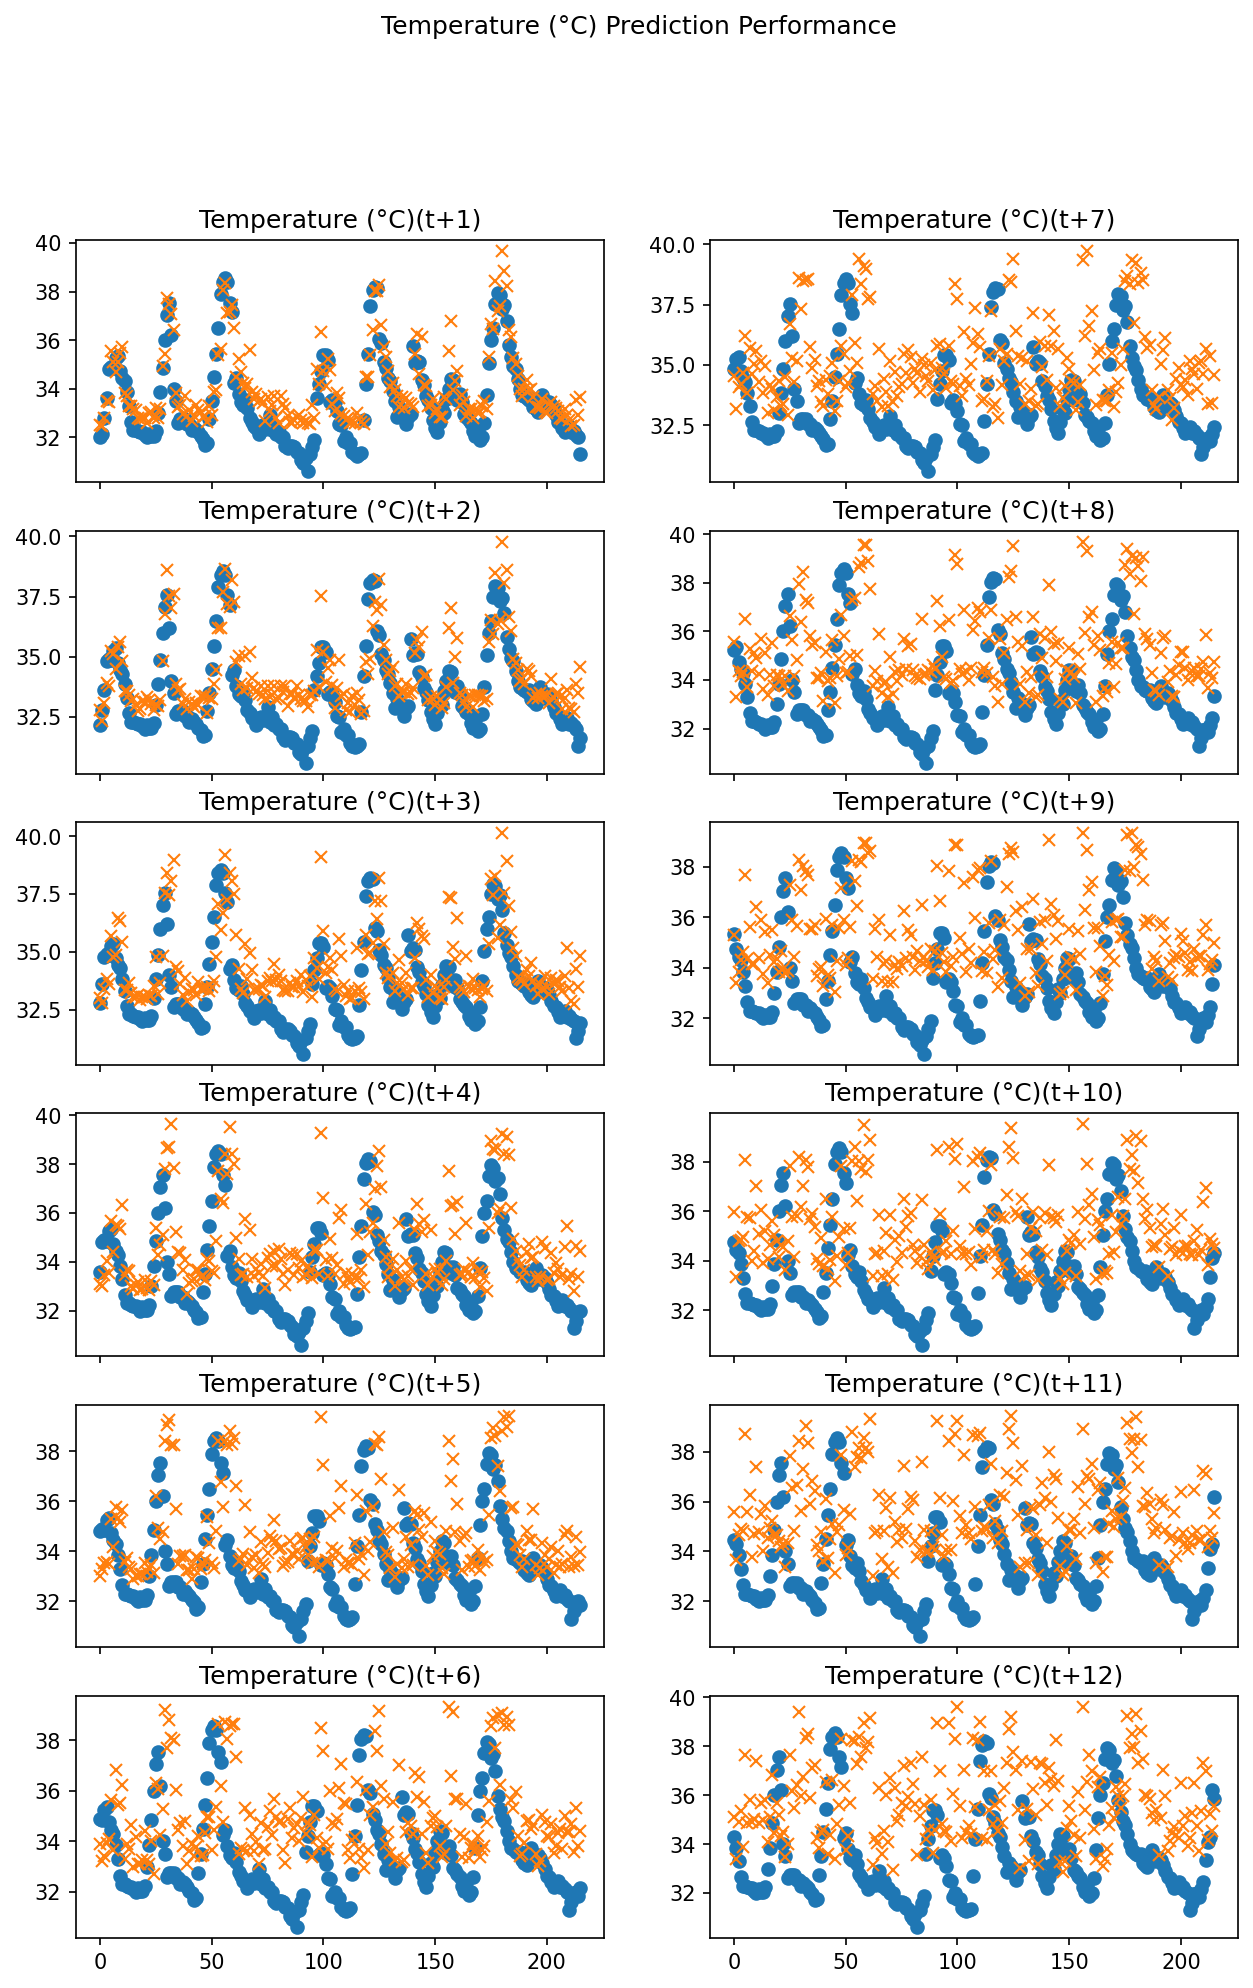

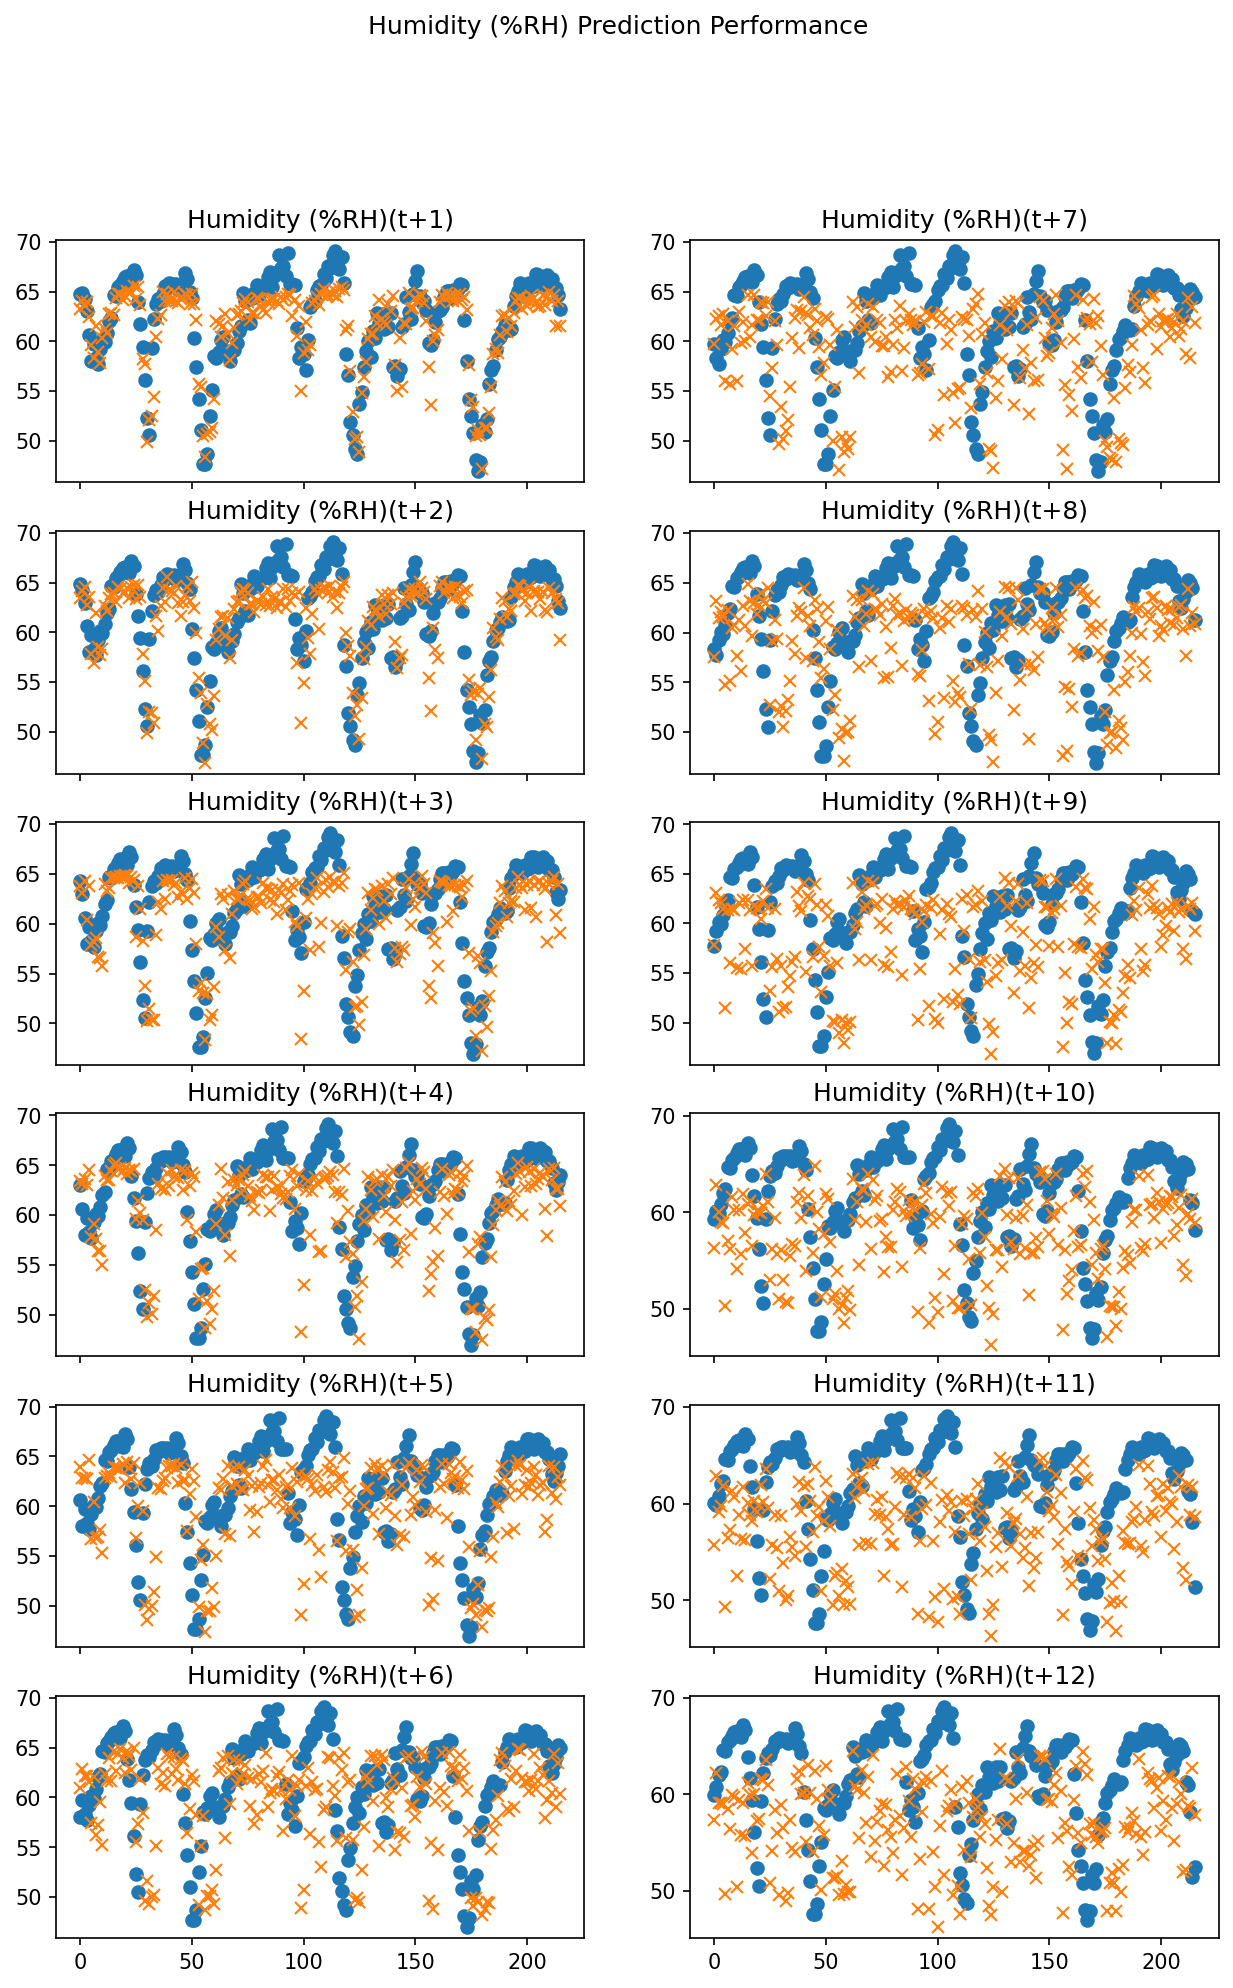

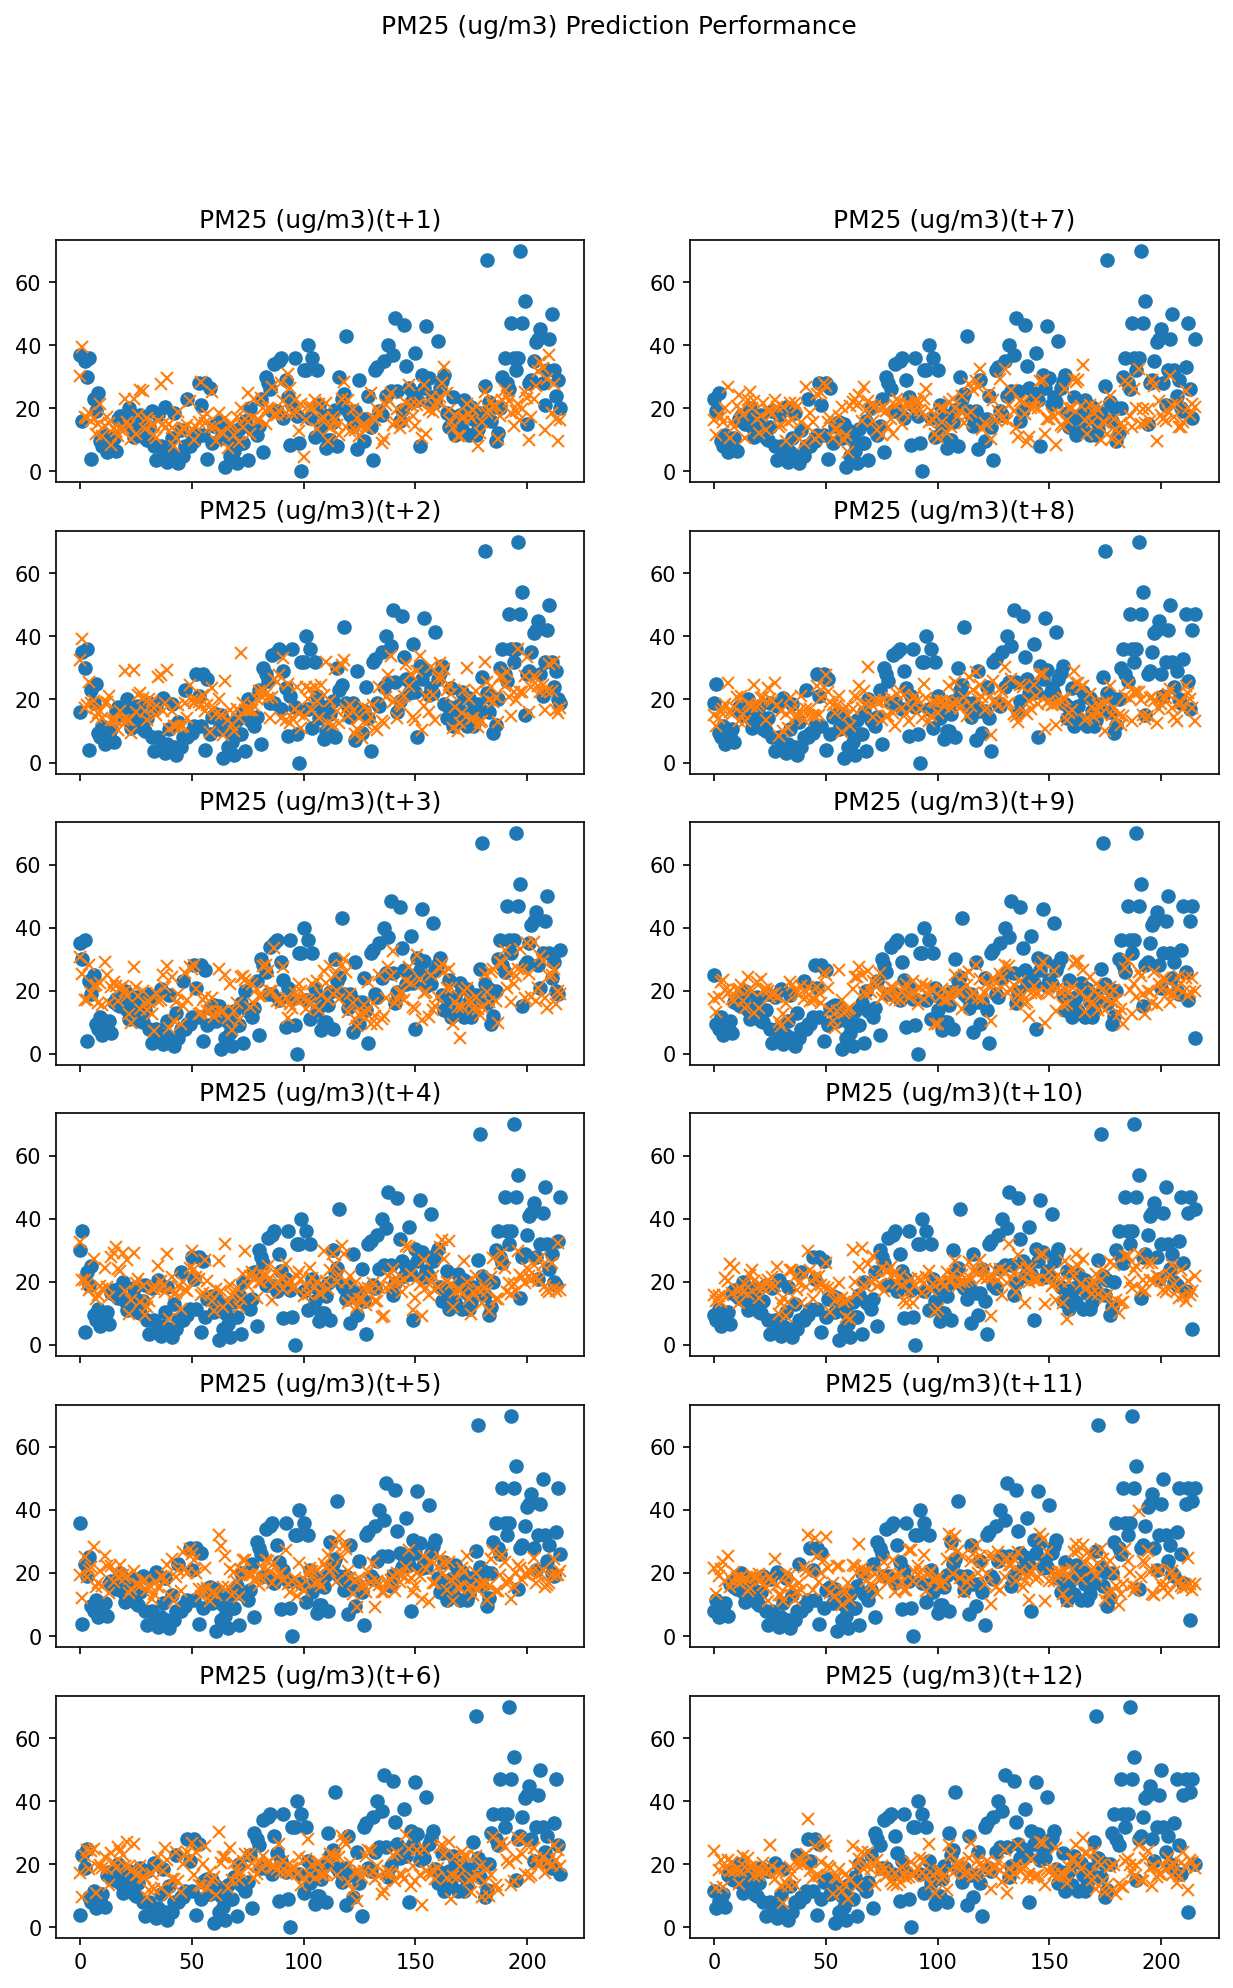

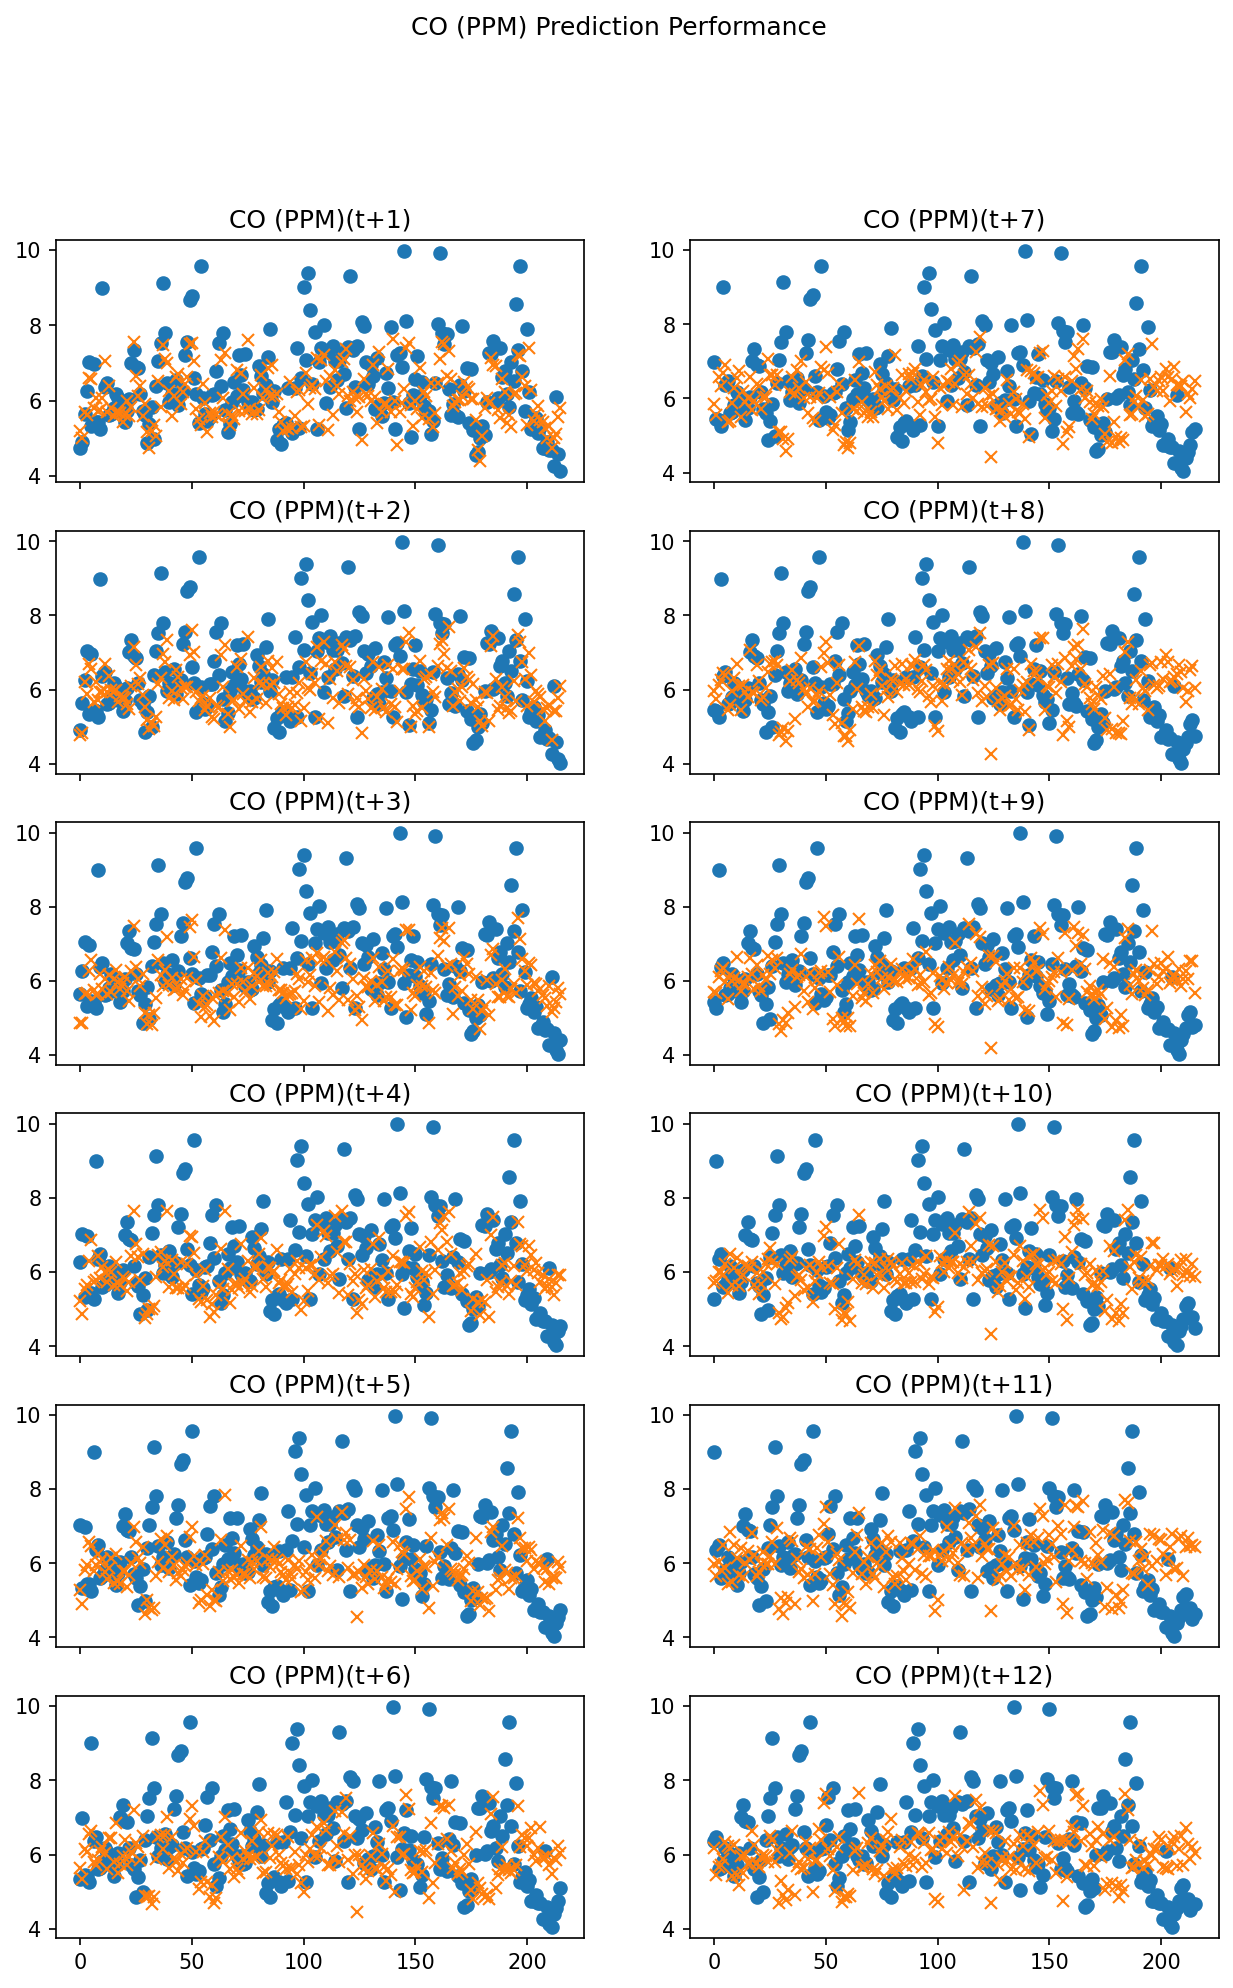

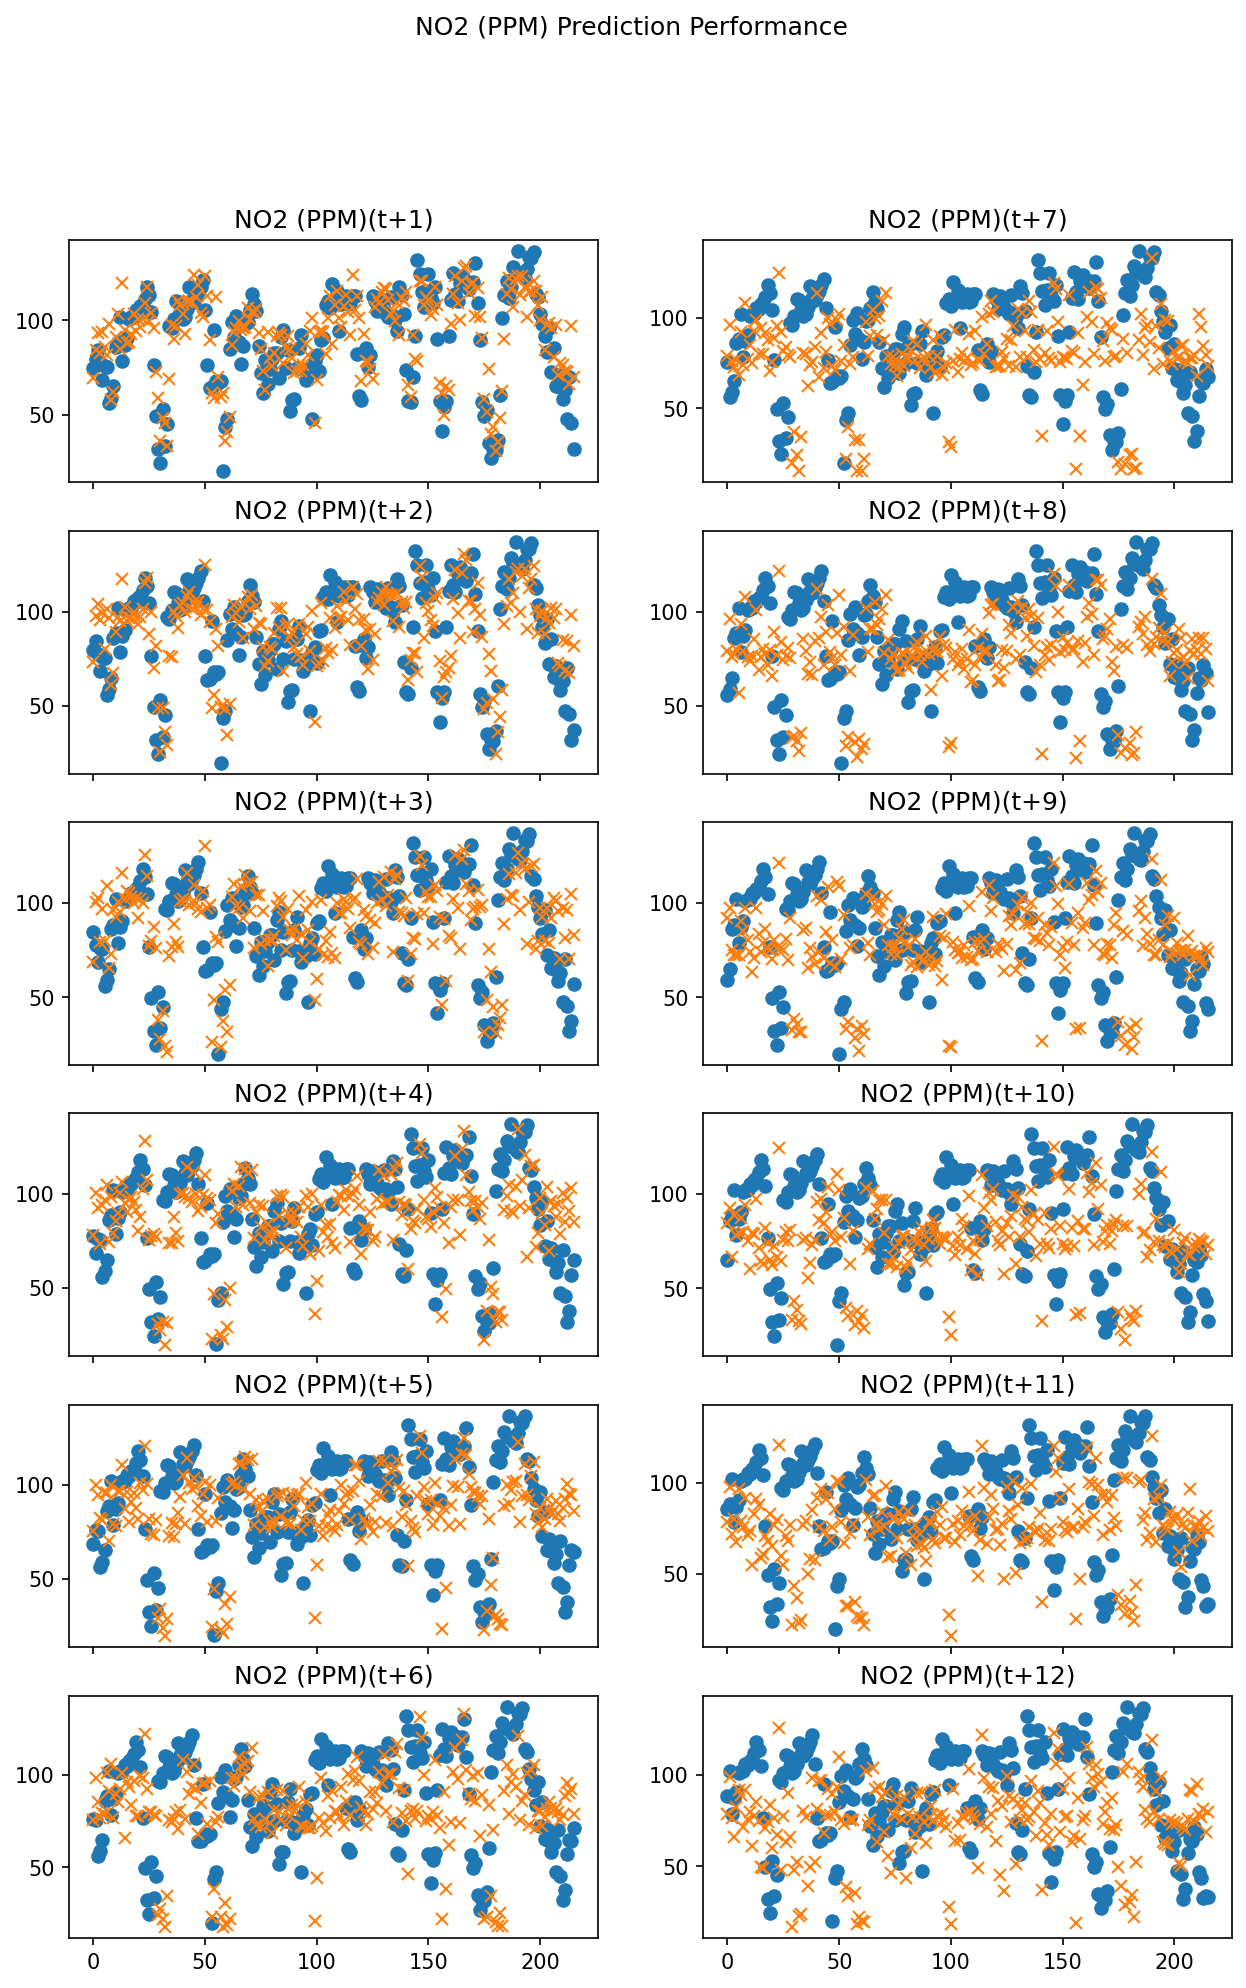

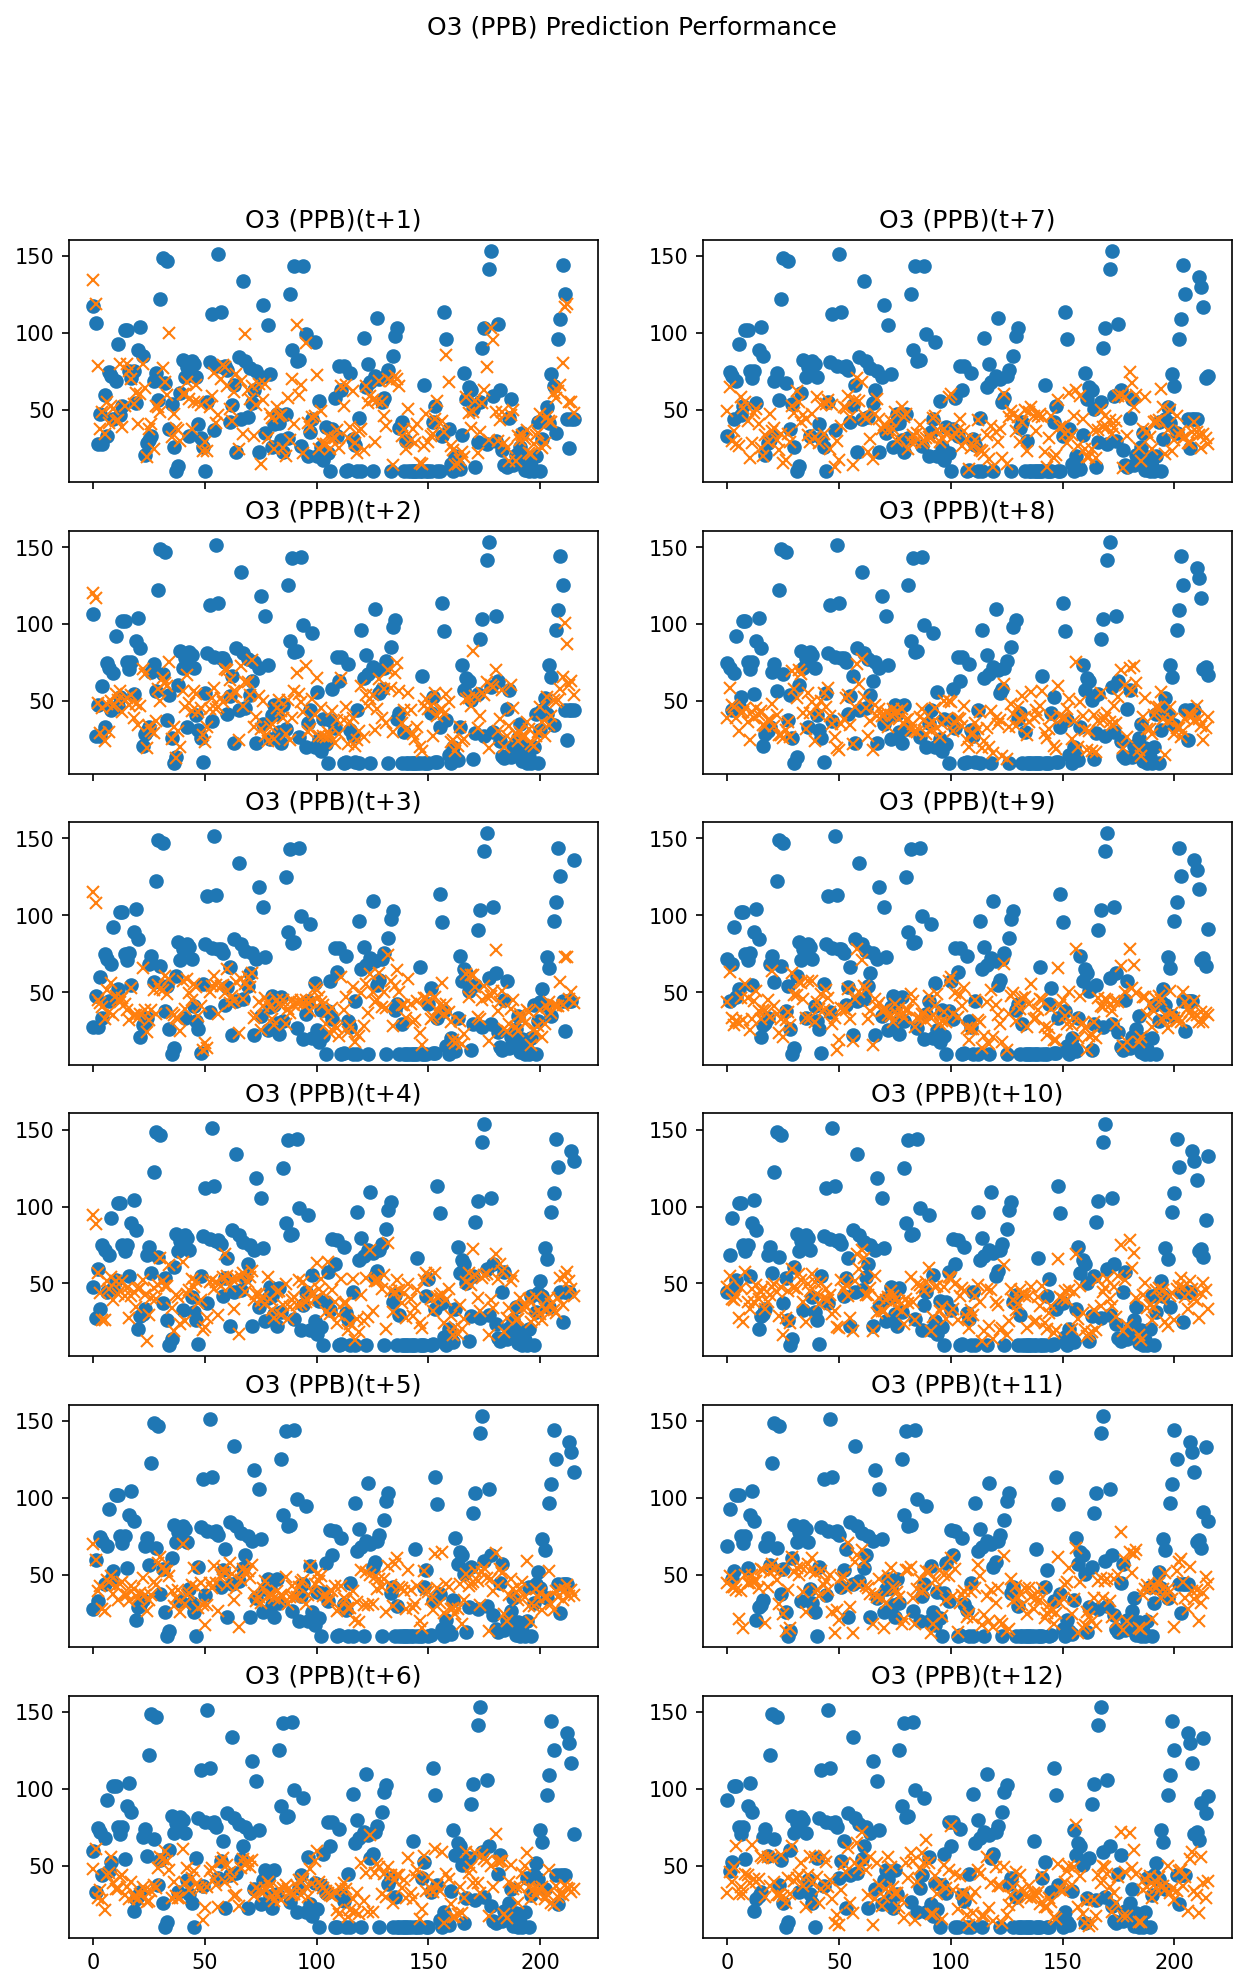

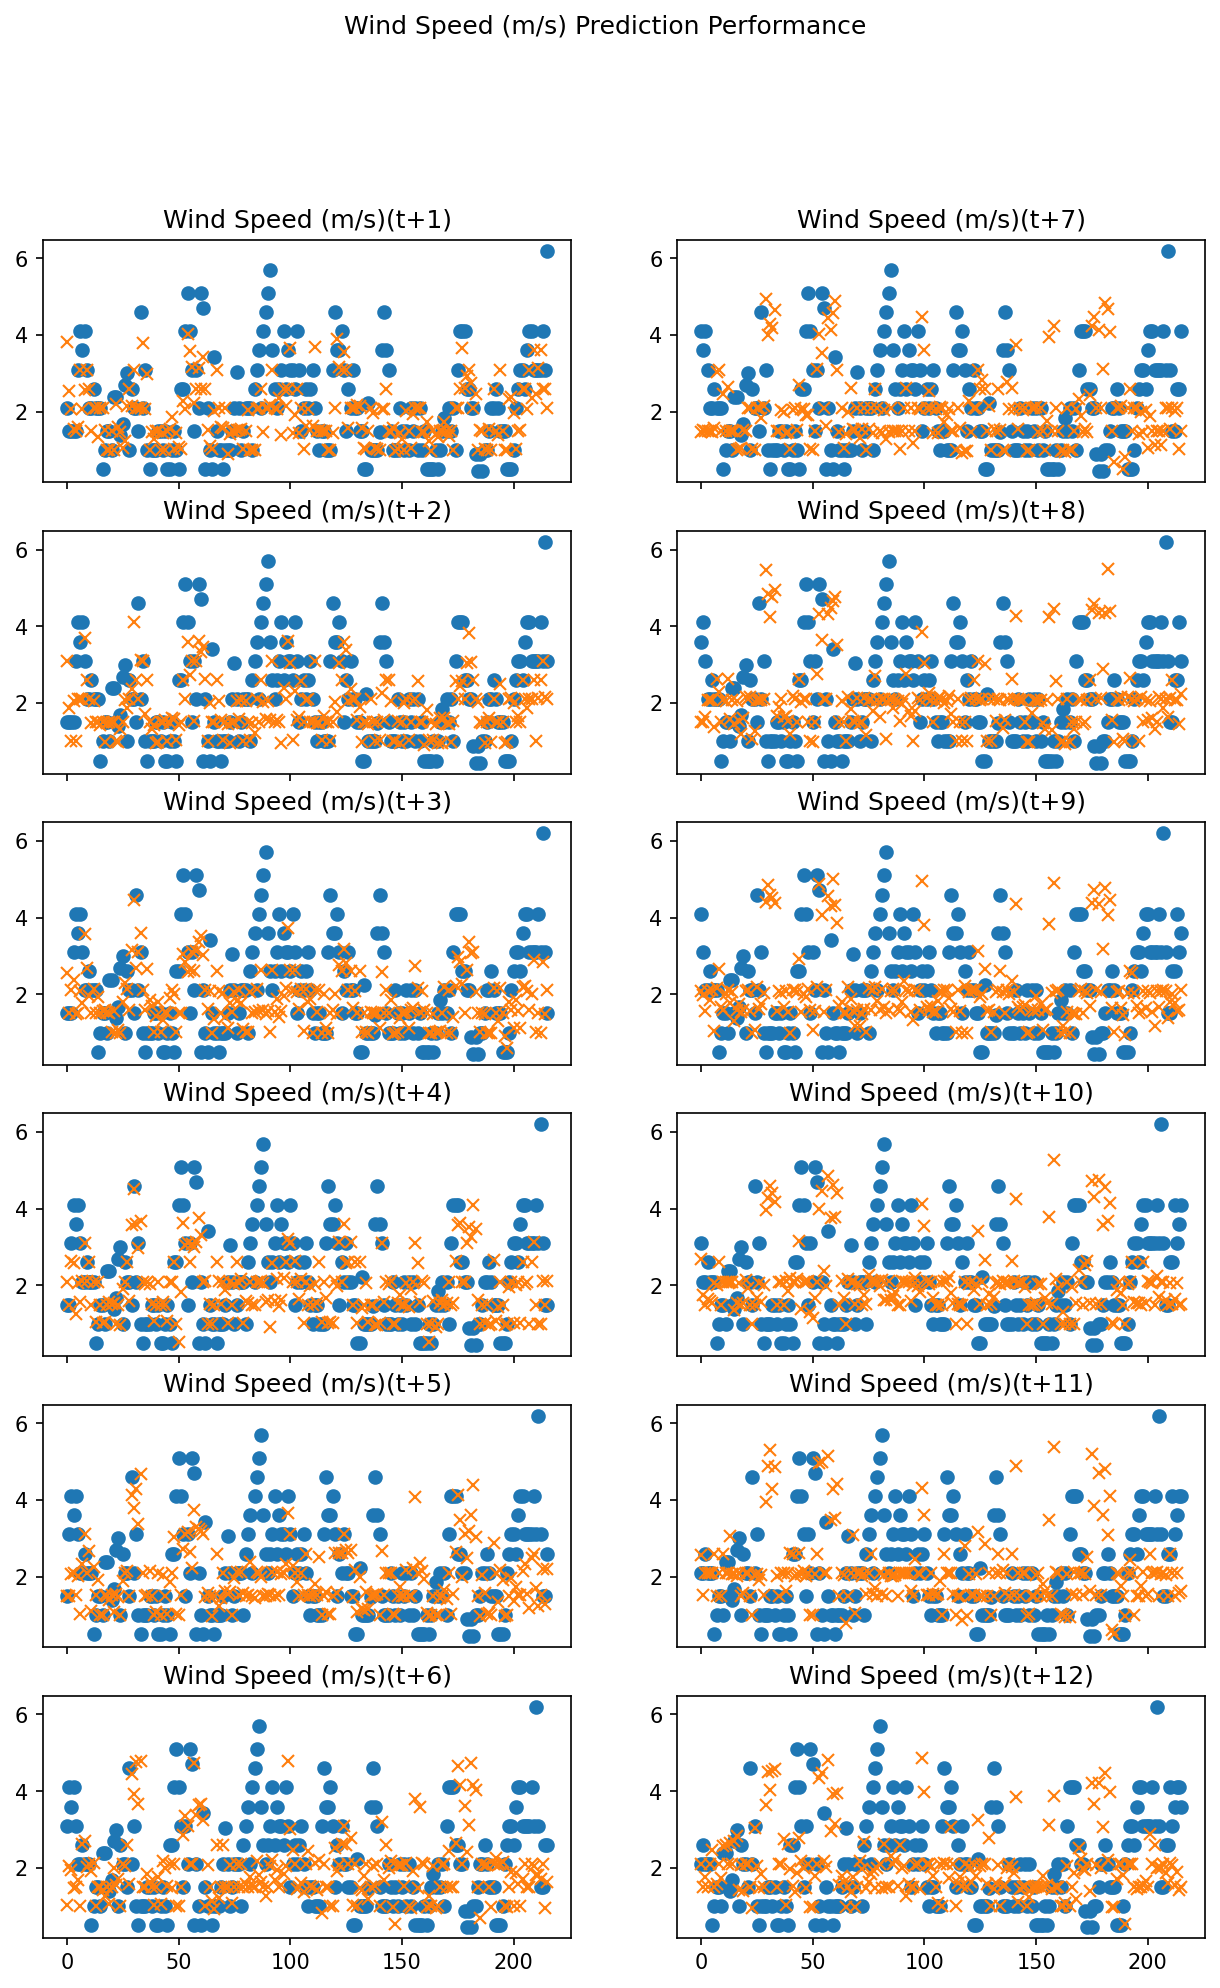

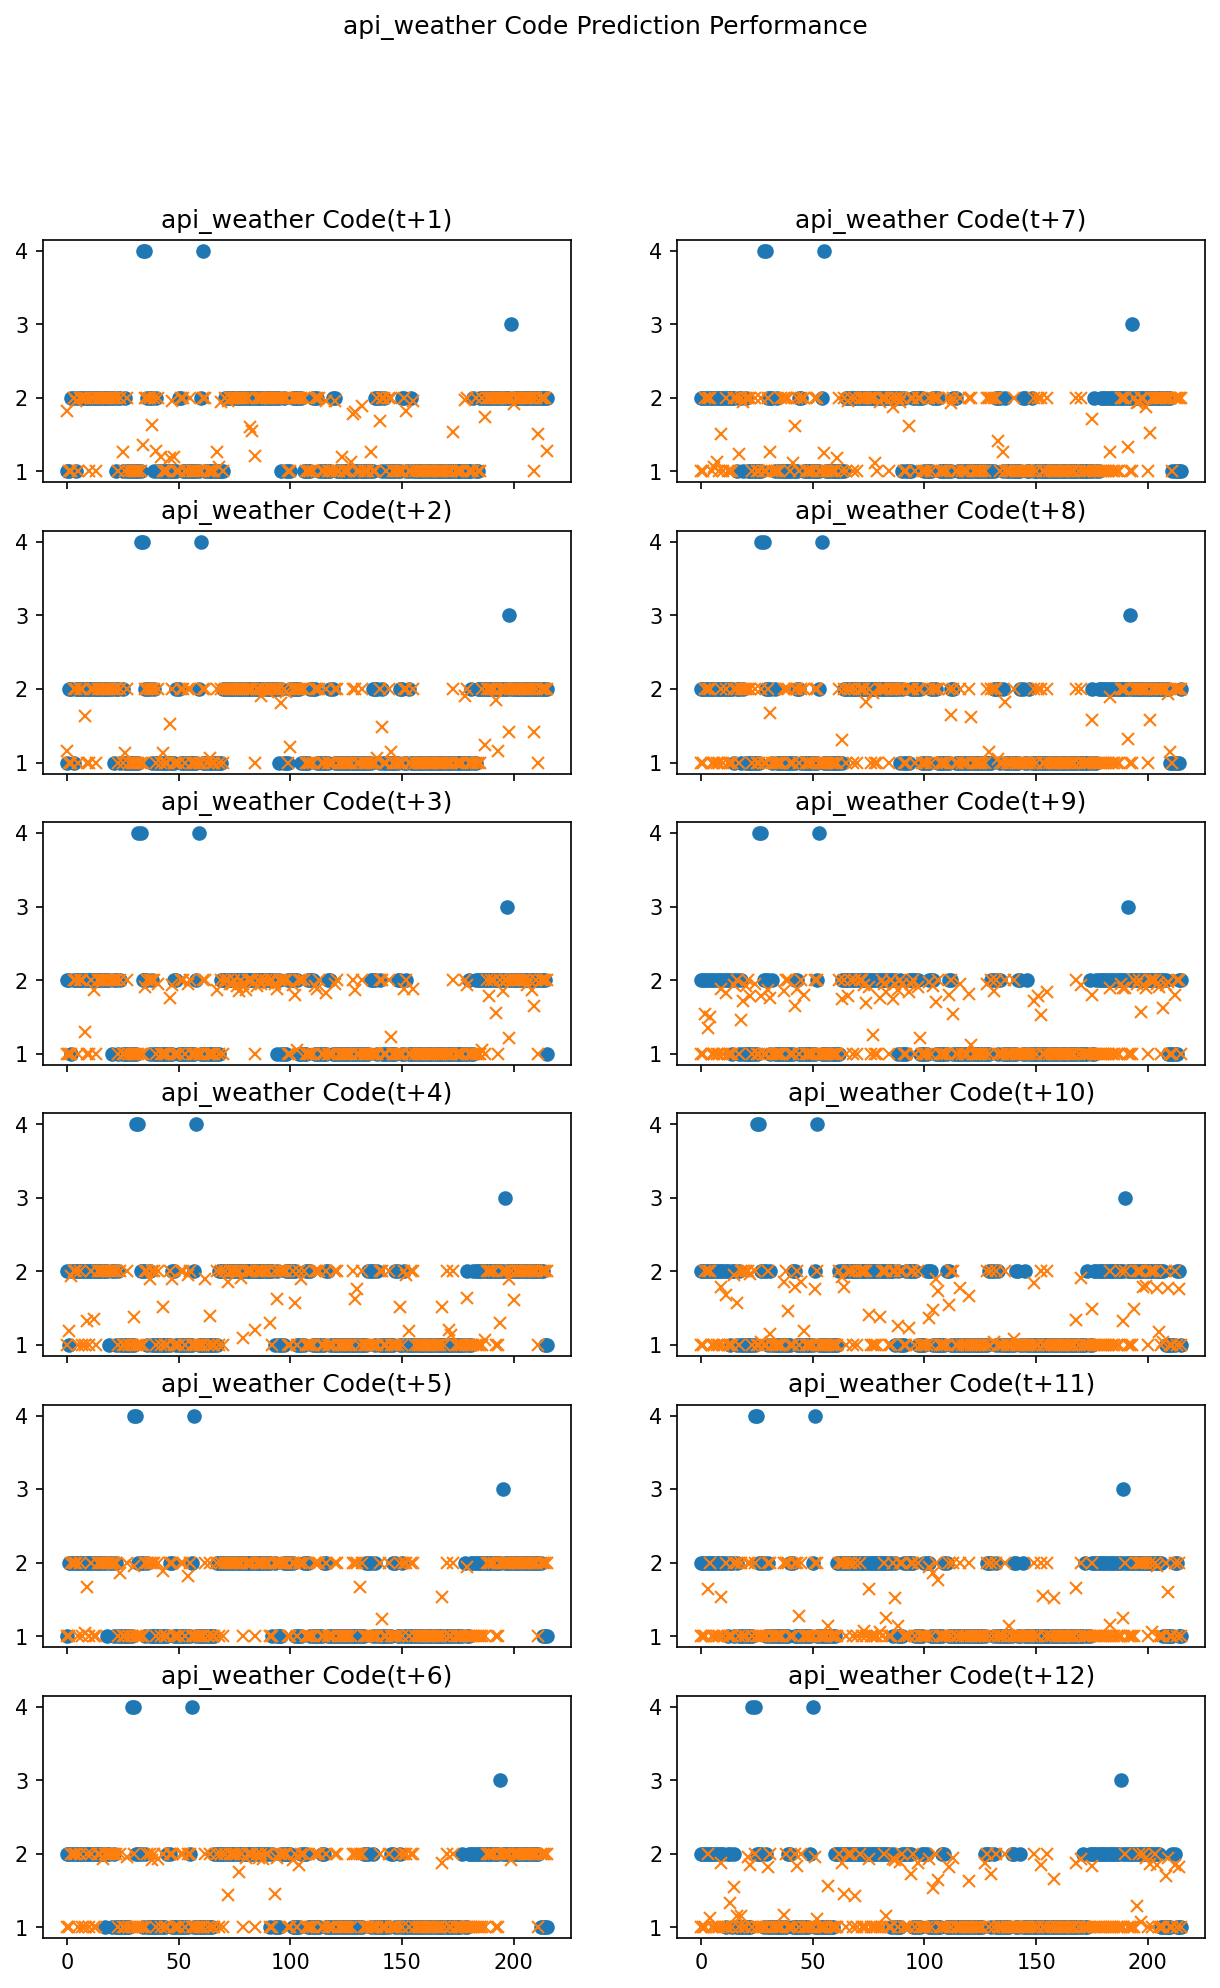

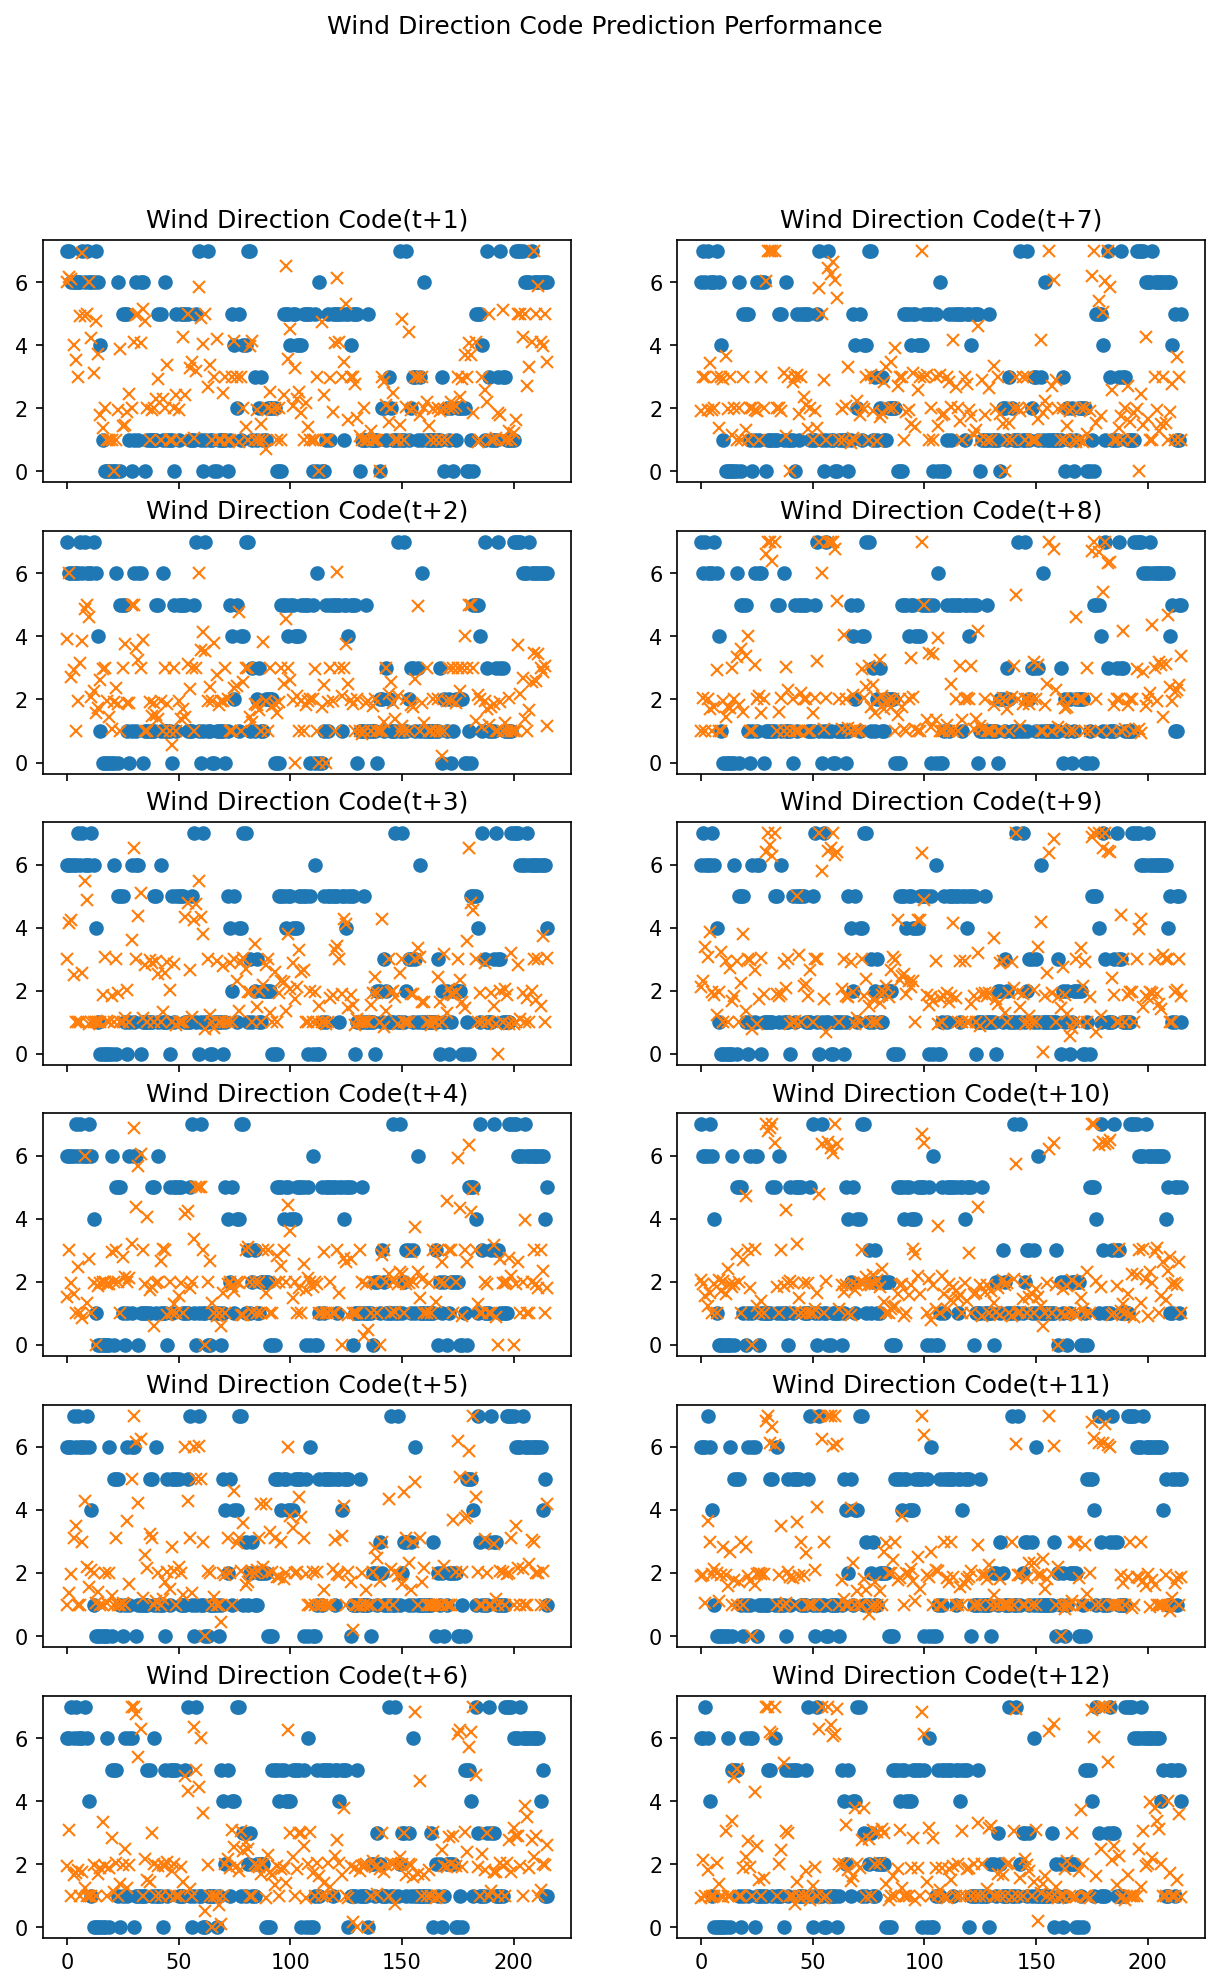

In [85]:
t = np.arange(0, len(x_test_pres))
cols = [val for val in dataset.columns.values if val != 'date']
target_idx = 0
for label_name in cols:
    x_test = x_test_pres
    row, col = 0, 0
    fig, ax = plt.subplots(nrows=6,ncols=2, sharex=True, figsize=(10,15), dpi=150)
    fig.suptitle('{} Prediction Performance'.format(label_name))
    for time_step in predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        ax[row][col].set_title('{}({})'.format(label_name, time_step))
        ax[row][col].plot(t, y_test_time, 'o')
        ax[row][col].plot(t, y_pred_time, 'x')
        if row < 5:
            row += 1
        else:
            row = 0
            col = col + 1 if col < 1 else 0
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

### Save the model for later use

In [86]:
import os

In [87]:
root_folder = 'ml_models'
model_name = 'ensemble_stacking'
dir_name = os.path.join(root_folder, model_name)
model_to_dump = ensemble_at_time

In [88]:
# save the model to disk
# try to create directory if not created yet
if not os.path.exists(dir_name):
    try:
        os.makedirs(dir_name)
    except OSError:
        print ("Creation of the directory %s failed" % dir_name)
    else:
        print ("Successfully created the directory %s" % dir_name)
for idx, model in enumerate(model_to_dump.values()):
    file_name = '{}_t{}_model.sav'.format(model_name, idx + 1)
    file_path = os.path.join(dir_name, file_name)
    joblib.dump(model, file_path)
    print('Dumped model into file ({})'.format(file_path))
print('done!')

Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t1_model.sav)
Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t2_model.sav)
Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t3_model.sav)
Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t4_model.sav)
Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t5_model.sav)
Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t6_model.sav)
Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t7_model.sav)
Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t8_model.sav)
Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t9_model.sav)
Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t10_model.sav)
Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t11_model.sav)
Dumped model into file (ml_models\ensemble_stacking\ensemble_stacking_t12_

### try to load model

In [101]:
import os

In [102]:
loaded_model = {}
root_folder = 'ml_models'
model_name = 'ensemble_stacking'
dir_name = os.path.join(root_folder, model_name)

In [103]:
for time_idx in range(1, 13, 1):
    file_name = '{}_t{}_model.sav'.format(model_name, time_idx)
    file_path = os.path.join(dir_name, file_name)
    if os.path.exists(file_path):
        loaded_model['t+{}'.format(time_idx)] = joblib.load(file_path)
        print('Loaded model from file {}'.format(file_name))
    else:
        continue
if loaded_model:
    ensemble_at_time = loaded_model
else:
    print('warning! nothing loaded in model.')
print('done!')

Loaded model from file ensemble_stacking_t1_model.sav
Loaded model from file ensemble_stacking_t2_model.sav
Loaded model from file ensemble_stacking_t3_model.sav
Loaded model from file ensemble_stacking_t4_model.sav
Loaded model from file ensemble_stacking_t5_model.sav
Loaded model from file ensemble_stacking_t6_model.sav
Loaded model from file ensemble_stacking_t7_model.sav
Loaded model from file ensemble_stacking_t8_model.sav
Loaded model from file ensemble_stacking_t9_model.sav
Loaded model from file ensemble_stacking_t10_model.sav
Loaded model from file ensemble_stacking_t11_model.sav
Loaded model from file ensemble_stacking_t12_model.sav
done!


# Do some statistical testing on the ensemble model vs the recurrent SVR

In [92]:
from scipy import stats

In [93]:
# build predictors
rsvr_predictor = Predictor('recurrent', rsvr_at_time)
ensemble_predictor = Predictor('recurrent', ensemble_at_time)

In [94]:
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
rsvr_plcc = {}
for label_name in cols:
    print('PLCC for {}'.format(label_name))
    rsvr_plcc[label_name] = list()
    for time_step in rsvr_predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = rsvr_predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        plcc = pearsonr(y_test_time, y_pred_time)
        rsvr_plcc[label_name].append(plcc[0])
        print('Model({}): {}'.format(time_step, plcc))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

PLCC for Temperature (°C)
Model(t+1): (0.9290839762656655, 2.1383184429675693e-94)
Model(t+2): (0.810408251530852, 1.3653508587425057e-51)
Model(t+3): (0.6565777136218007, 5.0773400320877935e-28)
Model(t+4): (0.491495235869105, 1.547797685784717e-14)
Model(t+5): (0.3310104510881542, 6.436178786867858e-07)
Model(t+6): (0.19540957313813467, 0.003937765756277247)
Model(t+7): (0.06777684370130058, 0.3214547918351316)
Model(t+8): (-0.03857202756905542, 0.5728826250308228)
Model(t+9): (-0.1239720647422634, 0.06899402465512376)
Model(t+10): (-0.18682769433870589, 0.00588439686153907)
Model(t+11): (-0.23270135456502225, 0.0005655857293312053)
Model(t+12): (-0.25857530998559525, 0.00012114877494194575)
PLCC for Humidity (%RH)
Model(t+1): (0.9271698902058563, 3.330061371319396e-93)
Model(t+2): (0.8032035036335199, 4.863471309610636e-50)
Model(t+3): (0.6468653903099717, 5.428600672168283e-27)
Model(t+4): (0.4790193819050396, 8.639210006368726e-14)
Model(t+5): (0.3295775108859301, 7.24018602019896

In [95]:
# gather plcc for ensemble
cols = [val for val in dataset.columns.values if val != 'date']
x_test = x_test_pres
target_idx = 0
ensemble_plcc = {}
for label_name in cols:
    print('PLCC for {}'.format(label_name))
    ensemble_plcc[label_name] = list()
    for time_step in ensemble_predictor.predictors:
        time_step_num = int(time_step.split('+')[1])
        preds = ensemble_predictor.predict(x_test, time_step_num)
        y_pred_time = [ preds[forecast_idx][target_idx] for forecast_idx in range(preds.shape[0]) ]
        y_test_time = xy_test_at_time[time_step].iloc[:, target_idx]
        plcc = pearsonr(y_test_time, y_pred_time)
        ensemble_plcc[label_name].append(plcc[0])
        print('Model({}): {}'.format(time_step, plcc))
    if target_idx < len(cols):
        target_idx += 1
    else:
        target_idx = 0

PLCC for Temperature (°C)
Model(t+1): (0.8844284579838142, 9.083960290801582e-73)
Model(t+2): (0.7626520647825986, 2.283150055562803e-42)
Model(t+3): (0.5812296172403527, 6.484971591940261e-21)
Model(t+4): (0.4306929910183388, 3.623962925148087e-11)
Model(t+5): (0.30012582155279705, 7.147036827511228e-06)
Model(t+6): (0.17043442766820918, 0.012117225339850535)
Model(t+7): (0.09548822619976656, 0.1619812995733002)
Model(t+8): (0.05870056369835347, 0.39064227761920156)
Model(t+9): (0.00039825427156599095, 0.9953570115273213)
Model(t+10): (-0.049947811982563976, 0.4652212580226511)
Model(t+11): (-0.12499239375267981, 0.06672180266997312)
Model(t+12): (-0.11198496109590636, 0.10070335949171193)
PLCC for Humidity (%RH)
Model(t+1): (0.8844713715398582, 8.75093693135591e-73)
Model(t+2): (0.7641438886688601, 1.2706070820855673e-42)
Model(t+3): (0.5929189256855697, 6.763595528634394e-22)
Model(t+4): (0.42087140057501976, 1.105285989786991e-10)
Model(t+5): (0.2891763627506317, 1.574788968623211e

In [96]:
for label_name in rsvr_plcc:
    print('-- two-tailed t-test for {} --'.format(label_name))
    ttest, pval = stats.ttest_ind(ensemble_plcc[label_name], rsvr_plcc[label_name])
    print('p-val = {}, stats = {}'.format(pval, ttest))
    if abs(pval) > 0.05:
        print("==both are statistically insignificant")
    elif ttest < 0.0:
        print("==rsvr_plcc is superior")
    else:
        print("==(!!!) ensemble is superior") 

-- two-tailed t-test for Temperature (°C) --
p-val = 0.8514427043892844, stats = 0.18949447015696216
==both are statistically insignificant
-- two-tailed t-test for Humidity (%RH) --
p-val = 0.8501760092028384, stats = 0.19113083878147702
==both are statistically insignificant
-- two-tailed t-test for PM25 (ug/m3) --
p-val = 0.007212866399852299, stats = 2.9612625299313886
==(!!!) ensemble is superior
-- two-tailed t-test for CO (PPM) --
p-val = 0.6469159530126198, stats = 0.464411632141815
==both are statistically insignificant
-- two-tailed t-test for NO2 (PPM) --
p-val = 0.6667369235855733, stats = 0.43648738797135284
==both are statistically insignificant
-- two-tailed t-test for O3 (PPB) --
p-val = 0.8352971488018988, stats = -0.2103932844520401
==both are statistically insignificant
-- two-tailed t-test for Wind Speed (m/s) --
p-val = 0.3119002708081536, stats = 1.0350268298794136
==both are statistically insignificant
-- two-tailed t-test for api_weather Code --
p-val = 0.003474